# Business Understanding

## Overview

# Data Understanding

The data being used is from a Credit Bereau. and it consists of:

**Application Data:**
* **Application_ID**: Unique Application Number
* **Application_Date**: Date of application
* **Loan_Approval_Status**: Approval status of loan
* **Age_at_Application**: Age in Years at point of application
* **Marital_Status**: Marital status at point of application
* **Gender**: Sex
* **Own_Rent_Home**: Residential status of home ownership
* **Occupation_Professional_Category**: Proffessional Category
* **Type_of_Business_Industry_of_Employment**: Industry of Employment
* **Employment_Status**: Employment status
* **Time_at_Current_Employment_(Months)**: Time at current employment in months
* **Time_Employed_with_Previous_Employer_(Months)**: Time at previous employment in months
* **Number_of_Dependents**: Number of dependents
* **Loan_Purpose**: Purpose of Loan Applied
* **Monthly_Income**: Monthly Income in KES
* **Government_Employee**: Flag if government employee

**Contracts Data:**
* **Contract_ID**:	Loan Account Number
* **Application_ID**	Application Number related to the loan opened
* **Key**:	Number of Open Contracts related to the loan application Number
* **Loan_Type**:	Type of loan facility
* **Contract_Start_Date**:	Date of start for Loan facility
* **Expected_Contract_End_Date**:	Expected date of loan maturity
* **Actual_Contract_End_Date**:	Actual date when the contrcat was closed
* **Loan_Term**:	Tenure of loan in months
* **Total_Loan_Amount**:	Loan amount approved

**Contracts Snapshop data:**
* **Contract Id**:	Loan Account Number*
* **Snapshot Date**:	The End of Month when the data was reported
* **Outstanding Amount**:	The outstanding balance as at the reporting date
* **Due Amount**:	The amount unpaid as at the reporting date
* **Number of Days Past Due**:	The number of days past due as at that reporting date
* **Contract Status**:	The status of the contract

**CRB Data:**
* **Application_ID**:	Application Number related to the loan opened
* **Application_Date**:	Date of application
* **CRB Score**:	Credit Bureau Risk Score
* **CRB Grade**:	Credit Bureau Risk Grade

**Current and Savings Account Data:**
* **Account Number**:	Application Number related to the loan opened
* **Application ID**:	Application Number related to the loan opened
* **Month (YYYY-MM)**:	The reporting month when the data was calculated
* **Open Date**:	The date when the account was openned
* **Closed Date**:	The date when the account was closed
* **Average Balance**:	The monthly average balance
* **Overdraft Limit**:	Overdraft Limit
* **Number of Days in Debit during Month**:	Number of Days in Debit during Month
* **Number of Days in Credit during Month**: Number of Days in Credit during Month
* **Maximum End of Day Balance**:	Maximum End of Day Balance
* **Minimum End of Day Balance**:	Minimum End of Day Balance
* **Sum of Monthly Debit Transactions**: Sum of Monthly Debit Transactions
* **Sum of Monthly Credit Transactions**:	Sum of Monthly Credit Transactions
* **Last Transaction Date**:	Last Transaction Date
* **Sum of ATM Deposits**:	Sum of ATM Deposits
* **Number of ATM Deposits**:	Number of ATM Deposits
* **Sum of ATM Withdrawals**:	Sum of ATM Withdrawals
* **Number of ATM Withdrawals**:	Number of ATM Withdrawals
* **Sum of Cheque Debit Transactions**:	Sum of Cheque Debit Transactions
* **Number of Cheque Debit Transactions**:	Number of Cheque Debit Transactions
* **Sum of Bounced Cheque transactions**:	Sum of Bounced Cheque transactions
* **Number of Bounced Cheques**:	Number of Bounced Cheques
* **Sum of Debit Card POS Transactions**:	Sum of Debit Card POS Transactions
* **Number of Debit Card POS Transactions**:	Number of Debit Card POS Transactions
* **Sum of Over the Counter Withdrawals**:	Sum of Over the Counter Withdrawals
* **Number of Over the Counter withdrawals**:	Number of Over the Counter withdrawals
* **Account Type**:	Type of account
* **Account Status**:	Latest status of the account
* **Number of Joint Holders**:	Number of Persons owning the account
* **SnapshotMonth**:	The reporting month when the data was calculated

![image.png](.\images\erpdiagram.png)

In [435]:
# Loading the relevant libraries

# Data pre-processsing libraries
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import StandardScaler

import itertools
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics libraries
from scipy.stats import chi2_contingency
from sklearn.metrics import  f1_score, roc_auc_score, precision_recall_curve, accuracy_score,roc_curve, confusion_matrix, recall_score

from sklearn.decomposition import PCA

# Data modeling libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# import xgboost as xgb # XGBoost, LightGBM, CatBoost

# 

### Application Dataset

In [436]:
# Load data
# app_data = pd.read_csv("./data/1. ApplicationData.csv")
app_data = pd.read_csv("C:/Users/amerc/Desktop\Project data/1. ApplicationData.csv")

# Check 2 top rows
app_data.head(2)

,Application_ID,Application_Date,Loan_Approval_Status,Age_at_Application,Marital_Status,Gender,Own_Rent_Home,Occupation_Professional_Category,Type_of_Business_Industry_of_Employment,Employment_Status,Time_at_Current_Employment_(Months),Time_Employed_with_Previous_Employer_(Months),Number_of_Dependents,Loan_Purpose,Monthly_Income,Government_Employee
0,C302100001,2015-09-15,Approved,39.0,Unmarried,Female,Own,NaN,Other,Full-Time,6.0,NaN,2.0,Home Improvement,1500.59,NaN
1,C302100002,2015-08-31,Approved,29.0,Unmarried,Female,Family,NaN,NaN,Full-Time,25.0,NaN,0.0,Debt Consolidation,3769.36,NaN


In [437]:
# Get data summary
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9492 entries, 0 to 9491
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Application_ID                                 9492 non-null   object 
 1   Application_Date                               9492 non-null   object 
 2   Loan_Approval_Status                           9354 non-null   object 
 3   Age_at_Application                             9471 non-null   float64
 4   Marital_Status                                 7712 non-null   object 
 5   Gender                                         9488 non-null   object 
 6   Own_Rent_Home                                  8188 non-null   object 
 7   Occupation_Professional_Category               9361 non-null   object 
 8   Type_of_Business_Industry_of_Employment        7210 non-null   object 
 9   Employment_Status                              9357 

In [438]:
# Check Shape
app_data.shape

(9492, 16)

In [439]:
# Check null values
app_data.isnull().sum()

Application_ID                                      0
Application_Date                                    0
Loan_Approval_Status                              138
Age_at_Application                                 21
Marital_Status                                   1780
Gender                                              4
Own_Rent_Home                                    1304
Occupation_Professional_Category                  131
Type_of_Business_Industry_of_Employment          2282
Employment_Status                                 135
Time_at_Current_Employment_(Months)               232
Time_Employed_with_Previous_Employer_(Months)    9194
Number_of_Dependents                             1814
Loan_Purpose                                       42
Monthly_Income                                      0
Government_Employee                               181
dtype: int64

*Observation*

* The ApplicationData has $9,492$ records under $16$ columns.
* All the columns have null values apart from the *'Application_ID'*, *'Application_Date'*, and *'Monthly_Income'* columns.
* The 'Application_Date' column is  an object dtype. thiss needs to be changed to 'date' datatype

### Contracts Data

In [440]:
# Load data
contract_data = pd.read_csv("C:/Users/amerc/Desktop\Project data/2. ContractsData.csv")

# Check 2 top rows
contract_data.head(2)

,Contract_ID,Application_ID,Key,Loan_Type,Contract_Start_Date,Expected_Contract_End_Date,Actual_Contract_End_Date,Loan_Term,Total_Loan_Amount
0,CONT100001,C302103426,1,Unsecured Personal Loan,2018-04-12,2023-04-12,NaN,60 - Month(s),24529.89
1,CONT100002,C302103426,2,Unsecured Personal Loan,2018-04-12,2023-04-12,NaN,60 - Month(s),35085.79


In [441]:
# show data summary
contract_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9374 entries, 0 to 9373
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Contract_ID                 9374 non-null   object 
 1   Application_ID              7598 non-null   object 
 2   Key                         9374 non-null   int64  
 3   Loan_Type                   9374 non-null   object 
 4   Contract_Start_Date         9374 non-null   object 
 5   Expected_Contract_End_Date  9374 non-null   object 
 6   Actual_Contract_End_Date    2593 non-null   object 
 7   Loan_Term                   9374 non-null   object 
 8   Total_Loan_Amount           9374 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 659.2+ KB


In [442]:
# Check shape
contract_data.shape

(9374, 9)

In [443]:
# Check null values
contract_data.isnull().sum()

Contract_ID                      0
Application_ID                1776
Key                              0
Loan_Type                        0
Contract_Start_Date              0
Expected_Contract_End_Date       0
Actual_Contract_End_Date      6781
Loan_Term                        0
Total_Loan_Amount                0
dtype: int64

*Observation*
* The contract data is of $9$ columns with $9,374$ records
* The dates are in the object dtype, will need to be changed to date format
* The contracts data has null values on the *'Application_ID'* and *'Actual_Contract_End_Date'* columns.


### Contracts Snapshot data

In [444]:
# Load the dataset
contractsSnapshot_data = pd.read_csv("C:/Users/amerc/Desktop/Project data/3. ContractsSnapshotData.csv")

# Check top 2 rows
contractsSnapshot_data.head(2)

,Contract_ID,Snapshot Date,Outstanding Amount,Due Amount,Number of Days Past Due,Contract Status
0,CONT109375,2018-12-31,0.00,0.0,NaN,Closed
1,CONT109376,2006-08-31,215.08,0.0,NaN,Active


In [445]:
# Check Data size
contractsSnapshot_data.shape

(274371, 6)

In [446]:
# Data summary
contractsSnapshot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274371 entries, 0 to 274370
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Contract_ID              274371 non-null  object 
 1   Snapshot Date            274371 non-null  object 
 2   Outstanding Amount       274371 non-null  float64
 3   Due Amount               274371 non-null  float64
 4   Number of Days Past Due  79158 non-null   float64
 5   Contract Status          274371 non-null  object 
dtypes: float64(3), object(3)
memory usage: 12.6+ MB


In [447]:
# Check null values
contractsSnapshot_data.isnull().sum()

Contract_ID                     0
Snapshot Date                   0
Outstanding Amount              0
Due Amount                      0
Number of Days Past Due    195213
Contract Status                 0
dtype: int64

*Observation*
* Tha contractsSnapshot data has $6$ columns with $274,371$ rows.
* the date column is of object dtype. Will be changed to date dtype
* It has null values on the *'Number of Days Past Due'* column. On further checking, the null values are present on records that do not have *'Due Amount'*.

### CRB Data

In [448]:
# Load data
crb_data = pd.read_csv("C:/Users/amerc/Desktop/Project data/4. CRB Data.csv")

# Check top 2 rows
crb_data.head(2)

,Application_ID,Application_Date,CRB Score,CRB Grade
0,C302102137,2017-09-30,593,D
1,C302106175,2017-09-30,625,C


In [449]:
# Data summary
crb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6750 entries, 0 to 6749
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Application_ID    6750 non-null   object
 1   Application_Date  6750 non-null   object
 2   CRB Score         6750 non-null   int64 
 3   CRB Grade         6750 non-null   object
dtypes: int64(1), object(3)
memory usage: 211.1+ KB


In [450]:
# Check null values
crb_data.isnull().sum()

Application_ID      0
Application_Date    0
CRB Score           0
CRB Grade           0
dtype: int64

In [451]:
# Check size
crb_data.shape

(6750, 4)

*Observation*
* CRB Data has $4$ columns with $6,750$ records.
* The CRB Data has no null values.
* The *'Application_Date'* column is of object dtype, to be changed to date dtype.

### Current_and_Savings Data

In [452]:
# load data
curr_savings_data = pd.read_csv("C:/Users/amerc/Desktop/Project data/5. Current and Savings Account Data.csv")

# Check top 2 rows
curr_savings_data.head(2)

,ID,Account_Number,Application ID,Month (YYYY-MM),Open Date,Closed Date,Average Balance,Overdraft Limit,Number of Days in Debit during Month,Number of Days in Credit during Month,...,Sum of Bounced Cheque transactions,Number of Bounced Cheques,Sum of Debit Card POS Transactions,Number of Debit Card POS Transactions,Sum of Over the Counter Withdrawals,Number of Over the Counter withdrawals,Account Type,Account Status,Number of Joint Holders,SpshotMonth
0,1,ACC10000001,C302100001,2015-09-01,2015-09-06,NaN,1986.09,0.0,0.0,25.0,...,NaN,0.0,NaN,0.0,NaN,0.0,Savings,Active,0.0,2015-09-01
1,2,ACC10000002,C302100001,2015-09-01,2015-09-06,2018-10-04,23.45,NaN,0.0,25.0,...,NaN,0.0,NaN,0.0,NaN,0.0,Savings,Closed,0.0,2015-09-01


In [453]:
# Dataset summary
curr_savings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857677 entries, 0 to 857676
Data columns (total 31 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      857677 non-null  int64  
 1   Account_Number                          857677 non-null  object 
 2   Application ID                          857672 non-null  object 
 3   Month (YYYY-MM)                         857647 non-null  object 
 4   Open Date                               857647 non-null  object 
 5   Closed Date                             161748 non-null  object 
 6   Average Balance                         857647 non-null  float64
 7   Overdraft Limit                         753484 non-null  float64
 8   Number of Days in Debit during Month    857647 non-null  float64
 9   Number of Days in Credit during Month   857647 non-null  float64
 10  Maximum End of Day Balance              8576

In [454]:
# Check size
curr_savings_data.shape

(857677, 31)

In [455]:
# Check null values
curr_savings_data.isnull().sum().sort_values()

ID                                             0
Account_Number                                 0
Application ID                                 5
Account Status                                30
Account Type                                  30
Number of Over the Counter withdrawals        30
Number of Debit Card POS Transactions         30
Number of Bounced Cheques                     30
Number of Cheque Debit Transactions           30
Number of ATM Withdrawals                     30
Number of ATM Deposits                        30
Number of Joint Holders                       30
SpshotMonth                                   30
Minimum End of Day Balance                    30
Maximum End of Day Balance                    30
Number of Days in Credit during Month         30
Month (YYYY-MM)                               30
Number of Days in Debit during Month          30
Average Balance                               30
Open Date                                     30
Sum of Monthly Credi

*Observation*
* The Current & Savings data has $31$ columns with $857,677$ records
* This data has null values on all the columns apart from the *'ID'* and *'Account_Number'* columns
* The date columns are also of object dtype. To be changed to date dtype

## Important features

* **ApplicationData.csv**: Loan_Approval_Status, Monthly_Income, Number_of_Dependents, Time_at_Current_Employment_(Months), Employment_Status
* **ContractsData.csv**: Loan_Type, Loan_Term, Total_Loan_Amount
* **ContractsSnapshotData.csv**: Outstanding Amount, Number of Days Past Due, Contract Status
* **CRB Data.csv**: CRB Score, CRB Grade
* **Current and Savings Account Data.csv**: Average Balance, Overdraft Limit, Sum of Monthly Credit Transactions, Number of Bounced Cheques


# Data Cleaning / Preparation

Understand the data
1. Handle missing data
2. Convert data types (e.g., datetime, categorical)
3. Handle duplicates
3. Merge datasets
4. Drop irrelevant columns
5. Normalize/encode data
6. Feature engineering
7. 


Define Functions

In [456]:
# Function to get numerical columns
def get_numerical_columns(df):
    return df.select_dtypes(include=['number']).columns.tolist()

# Function to get categorical columns
def get_categorical_columns(df):
    return df.select_dtypes(include=['object', 'category']).columns.tolist()

def calc_missing_values_percentage(df):
    
    # Calculate % of missing values
    missing_percentage = df.isnull().sum() * 100 / len(df)
    
    # Filter only columns with  50% missing values
    missing_percentage = missing_percentage[missing_percentage > 50] 
    
    # Sort in descending order
    missing_percentage = missing_percentage.sort_values(ascending=False)  

    return pd.DataFrame({'Column': missing_percentage.index, 'Missing_Percentage': missing_percentage.values})

# Create function to fix dates
def fix_date_format(date_str):
    # Check 4th character, if '-' remove it, otherwise return original string
    return re.sub(r'^(...)-', r'\1', date_str)

def change_to_date(df, date_cols):
    
    # Loop through list to change column dtype to datetime
    for col in date_cols:
        df[col] = pd.to_datetime(df[col]).astype("datetime64[D]")

# Function to replace leap year dates
def fix_leap_year_dates(df, columns):
    for col in columns:
        df.loc[:, col] = df[col].str.replace(r"(\d{4})-02-29", r"\1-02-28", regex=True)
        


### Handle missing data

#### Application data - missing values

In [457]:
# Check null values
app_data.isnull().sum()

Application_ID                                      0
Application_Date                                    0
Loan_Approval_Status                              138
Age_at_Application                                 21
Marital_Status                                   1780
Gender                                              4
Own_Rent_Home                                    1304
Occupation_Professional_Category                  131
Type_of_Business_Industry_of_Employment          2282
Employment_Status                                 135
Time_at_Current_Employment_(Months)               232
Time_Employed_with_Previous_Employer_(Months)    9194
Number_of_Dependents                             1814
Loan_Purpose                                       42
Monthly_Income                                      0
Government_Employee                               181
dtype: int64

In [458]:
# Get percentage of missing values above 50%
missing_app_data_values = calc_missing_values_percentage(app_data)
print(missing_app_data_values)

                                          Column  Missing_Percentage
0  Time_Employed_with_Previous_Employer_(Months)           96.860514


In [459]:
# Drop the column with 50% and above missing data
app_data.drop(columns='Time_Employed_with_Previous_Employer_(Months)', inplace=True)

In [460]:
# get numerical columns
numerical_cols = get_numerical_columns(app_data)
# print(numerical_cols)

# Replace all numerical columns with median
for col in numerical_cols:
    app_data[col].fillna(app_data[col].median(), inplace=True)

We will fill the null categorical values with 'unknown' apart from 'Gender' that we will add 'Other' as a category

In [461]:
# Get categorical columns without the primary keys - Application_ID
categorical_cols = ['Loan_Approval_Status', 'Marital_Status', 'Own_Rent_Home', 
                    'Occupation_Professional_Category',
                    'Type_of_Business_Industry_of_Employment', 'Employment_Status', 
                    'Loan_Purpose', 'Government_Employee']

for cat_col in categorical_cols:
    # app_data[cat_col].fillna(app_data["Application ID"].mode()[0], inplace=True)
    app_data[cat_col].fillna("unknown", inplace=True)

In [462]:
# Check unique values for Gender
app_data['Gender'].value_counts()

Male      4845
Female    4643
Name: Gender, dtype: int64

In [463]:
# Replace Null values with Other
app_data["Gender"].fillna("Other", inplace=True)

In [464]:
# Confirm
app_data.isnull().sum()

Application_ID                             0
Application_Date                           0
Loan_Approval_Status                       0
Age_at_Application                         0
Marital_Status                             0
Gender                                     0
Own_Rent_Home                              0
Occupation_Professional_Category           0
Type_of_Business_Industry_of_Employment    0
Employment_Status                          0
Time_at_Current_Employment_(Months)        0
Number_of_Dependents                       0
Loan_Purpose                               0
Monthly_Income                             0
Government_Employee                        0
dtype: int64

#### Contract data - missing values

In [465]:
# Check null values
contract_data.isnull().sum()

Contract_ID                      0
Application_ID                1776
Key                              0
Loan_Type                        0
Contract_Start_Date              0
Expected_Contract_End_Date       0
Actual_Contract_End_Date      6781
Loan_Term                        0
Total_Loan_Amount                0
dtype: int64

The null values are in the "Application_ID" and "Actual_Contract_End_Date".

Since end date is not indicated, we can replace with latest snapshopt date.

In [466]:
# Get max snapshot date per contract
latest_snapshot = contractsSnapshot_data.groupby("Contract_ID")["Snapshot Date"].transform('max')
latest_snapshot

# Fill missing 'Actual_End_Date' with the latest snapshot date per 'Contract_ID'
contract_data['Actual_Contract_End_Date'].fillna(latest_snapshot, inplace=True)

# Confirm
contract_data.isnull().sum()

Contract_ID                      0
Application_ID                1776
Key                              0
Loan_Type                        0
Contract_Start_Date              0
Expected_Contract_End_Date       0
Actual_Contract_End_Date         0
Loan_Term                        0
Total_Loan_Amount                0
dtype: int64

Since we cannot recreate or auto-geneate the primary key, then we can drop the records missing 'Application_ID'. 

In [467]:
# Drop rows with no Application_ID
contract_data.dropna(subset=["Application_ID"], inplace=True)

# Confirm
contract_data.isnull().sum()

Contract_ID                   0
Application_ID                0
Key                           0
Loan_Type                     0
Contract_Start_Date           0
Expected_Contract_End_Date    0
Actual_Contract_End_Date      0
Loan_Term                     0
Total_Loan_Amount             0
dtype: int64

#### ContractsSnapshotData - Missing Values

In [468]:
calc_missing_values_percentage(contractsSnapshot_data)

,Column,Missing_Percentage
0,Number of Days Past Due,71.149283


In [469]:
# Check missing values
contractsSnapshot_data.isnull().sum()

Contract_ID                     0
Snapshot Date                   0
Outstanding Amount              0
Due Amount                      0
Number of Days Past Due    195213
Contract Status                 0
dtype: int64

Checking the records missing number of days due,most of them have $0$ Due amount. So let us replace this with a $0$

In [470]:
# Check other features where "Number of Days Past Due" is null
contractsSnapshot_data[contractsSnapshot_data["Number of Days Past Due"].isnull()]

,Contract_ID,Snapshot Date,Outstanding Amount,Due Amount,Number of Days Past Due,Contract Status
0,CONT109375,2018-12-31,0.00,0.0,NaN,Closed
1,CONT109376,2006-08-31,215.08,0.0,NaN,Active
2,CONT109376,2006-09-30,215.08,0.0,NaN,Active
3,CONT109376,2006-10-31,215.08,0.0,NaN,Active
4,CONT109376,2006-11-30,215.08,0.0,NaN,Active
...,...,...,...,...,...,...
274366,CONT116311,202-1-08-31,117233.29,0.0,NaN,Active
274367,CONT116312,202-1-08-31,43789.21,0.0,NaN,Active
274368,CONT116313,202-1-08-31,160023.45,0.0,NaN,Active
274369,CONT116314,202-1-08-31,140679.95,0.0,NaN,Active


In [471]:
# Fill in with a '0'
contractsSnapshot_data['Number of Days Past Due'].fillna(0, inplace=True)

# Confirm
contractsSnapshot_data.isnull().sum()

Contract_ID                0
Snapshot Date              0
Outstanding Amount         0
Due Amount                 0
Number of Days Past Due    0
Contract Status            0
dtype: int64

CRB Data has no null values. So let us work on 'Current & Savings' data.

#### Current and Savings Data - missing values

In [434]:
# Check % of missing data
curr_savings_cols_to_drop = calc_missing_values_percentage(curr_savings_data)
curr_savings_cols_to_drop

,Column,Missing_Percentage


In [472]:
# Drop Columns with more than 50% missing values

# get list of columns
curr_savings_cols_to_drop = curr_savings_cols_to_drop['Column']

# Drop columns
curr_savings_data.drop(columns=curr_savings_cols_to_drop, inplace=True)

In [473]:
curr_savings_data.isnull().sum()

ID                                             0
Account_Number                                 0
Application ID                                 5
Month (YYYY-MM)                               30
Open Date                                     30
Closed Date                               695929
Average Balance                               30
Overdraft Limit                           104193
Number of Days in Debit during Month          30
Number of Days in Credit during Month         30
Maximum End of Day Balance                    30
Minimum End of Day Balance                    30
Sum of Monthly Debit Transactions          24686
Sum of Monthly Credit Transactions           148
Last Transaction Date                     332006
Sum of ATM Deposits                       843053
Number of ATM Deposits                        30
Sum of ATM Withdrawals                    668968
Number of ATM Withdrawals                     30
Sum of Cheque Debit Transactions          857043
Number of Cheque Deb

In [474]:
# Create a list of numerical columns without ID/index columns
curr_savings_numerical_cols = get_numerical_columns(curr_savings_data)
curr_savings_numerical_cols = ['Average Balance', 'Overdraft Limit', 
 'Number of Days in Debit during Month', 'Number of Days in Credit during Month',
 'Maximum End of Day Balance', 'Minimum End of Day Balance',
 'Sum of Monthly Debit Transactions', 'Sum of Monthly Credit Transactions',
 'Number of ATM Deposits', 'Number of ATM Withdrawals',
 'Number of Cheque Debit Transactions', 'Number of Bounced Cheques',
 'Number of Debit Card POS Transactions', 'Number of Over the Counter withdrawals',
 'Number of Joint Holders']

# Create a list of categorical columns without ID/index columns
curr_savings_cat_cols =get_categorical_columns(curr_savings_data)
curr_savings_cat_cols = ['Account Type', 'Account Status', 'SpshotMonth']

Since most caegorical columns values are unknown, we can fill in with 'unknown'

Let us fill in numerical columns with '0'

In [475]:
# Fill missing values
for cat_col in curr_savings_cat_cols:
    curr_savings_data[cat_col].fillna("unknown", inplace=True)
    
for num_col in curr_savings_numerical_cols:
    curr_savings_data[num_col].fillna(0, inplace=True)

In [476]:
# Drop columns with no primary key - Application ID
curr_savings_data.dropna(subset=["Application ID"], inplace=True)


In [477]:
# Replace dates with 
# Create a list of date columns
curr_savings_date_cols = ["Open Date", "Last Transaction Date", "Month (YYYY-MM)"]

# Fill missing dates
for col in curr_savings_date_cols:
    curr_savings_data[col].fillna("1900-01-01", inplace=True)
    # curr_savings_data["Closed Date"].fillna("1900-01-01", inplace=True)

# Confirm
curr_savings_data.isna().sum()

ID                                             0
Account_Number                                 0
Application ID                                 0
Month (YYYY-MM)                                0
Open Date                                      0
Closed Date                               695924
Average Balance                                0
Overdraft Limit                                0
Number of Days in Debit during Month           0
Number of Days in Credit during Month          0
Maximum End of Day Balance                     0
Minimum End of Day Balance                     0
Sum of Monthly Debit Transactions              0
Sum of Monthly Credit Transactions             0
Last Transaction Date                          0
Sum of ATM Deposits                       843048
Number of ATM Deposits                         0
Sum of ATM Withdrawals                    668963
Number of ATM Withdrawals                      0
Sum of Cheque Debit Transactions          857038
Number of Cheque Deb

### Convert date data to right format

From the observation, all date data types are in text format. Let us change all of them to the right format.

But before that, you'll notice some dates are not correctly recorded e.g. '*202-1-03-06*' which I think should be '*2021-03-06*'. So we will format it too.

From another observation, leap years were not recognized, so will adjust the dates to fit leap dates as it will not convert to datetime type if it is out of range.

In [478]:
# an example
app_data[9446:9450]

,Application_ID,Application_Date,Loan_Approval_Status,Age_at_Application,Marital_Status,Gender,Own_Rent_Home,Occupation_Professional_Category,Type_of_Business_Industry_of_Employment,Employment_Status,Time_at_Current_Employment_(Months),Number_of_Dependents,Loan_Purpose,Monthly_Income,Government_Employee
9446,C302109447,202-1-03-06,unknown,22.0,unknown,Female,unknown,Elementary Occupation,unknown,Contract,55.0,1.0,Other,1463.56,False
9447,C302109448,2018-07-05,Decline,31.0,unknown,Male,unknown,Officer,unknown,Full-Time,115.0,1.0,Other,3657.43,True
9448,C302109449,202-1-02-21,Customer Cancellation,24.0,unknown,Male,unknown,Officer,unknown,Full-Time,41.0,1.0,Other,3296.86,False
9449,C302109450,2018-08-22,Customer Cancellation,37.0,unknown,Female,unknown,Officer,unknown,Full-Time,134.0,1.0,Other,3749.84,True


In [479]:
# # Leap year Example
# contract_data[contract_data["Expected_Contract_End_Date"]=="2021-02-29"]

#### Application data dates format

In [480]:
# list of date_cols 
app_data_date_cols = ['Application_Date']

# Apply the function to fix the date column
app_data['Application_Date'] = app_data['Application_Date'].apply(fix_date_format)

#Call function to change to datetime format
change_to_date(app_data, app_data_date_cols)


#### Contracts Data  date type format

In [481]:
# list of date_cols 
contract_data_date_cols = ["Contract_Start_Date", "Expected_Contract_End_Date", "Actual_Contract_End_Date"]

# Apply the function to fix the date column
for col in contract_data_date_cols:
    contract_data[col] = contract_data[col].apply(fix_date_format)

# Fix Leap year
fix_leap_year_dates(contract_data, contract_data_date_cols)

# Chande to datetime datatype
change_to_date(contract_data, contract_data_date_cols)

# Confirm     
# app_data['Application_Date'].dtype
contract_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7598 entries, 0 to 7597
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Contract_ID                 7598 non-null   object        
 1   Application_ID              7598 non-null   object        
 2   Key                         7598 non-null   int64         
 3   Loan_Type                   7598 non-null   object        
 4   Contract_Start_Date         7598 non-null   datetime64[ns]
 5   Expected_Contract_End_Date  7598 non-null   datetime64[ns]
 6   Actual_Contract_End_Date    7598 non-null   datetime64[ns]
 7   Loan_Term                   7598 non-null   object        
 8   Total_Loan_Amount           7598 non-null   float64       
dtypes: datetime64[ns](3), float64(1), int64(1), object(4)
memory usage: 593.6+ KB


#### Contracts Snapshot date format

In [482]:
# Get date columns
contractSnapshot_date_cols = ["Snapshot Date"]

# Apply the function to fix the date column
for col in contractSnapshot_date_cols:
    contractsSnapshot_data[col] = contractsSnapshot_data[col].apply(fix_date_format)

# Fix Leap year
fix_leap_year_dates(contractsSnapshot_data, contractSnapshot_date_cols)

# Change to datetime datatype
change_to_date(contractsSnapshot_data, contractSnapshot_date_cols)

#### CRB Data date format

In [483]:
# Get date columns
crb_date_cols = ["Application_Date"]

# Apply the function to fix the date column
for col in crb_date_cols:
    crb_data[col] = crb_data[col].apply(fix_date_format)

# Fix Leap year
fix_leap_year_dates(crb_data, crb_date_cols)

# Change to datetime datatype
change_to_date(crb_data, crb_date_cols)

#### Current and Savings date format

In [484]:
# curr_savings_data
# Apply the function to fix the date column
for col in curr_savings_date_cols:
    curr_savings_data[col] = curr_savings_data[col].apply(fix_date_format)

# Fix Leap year
fix_leap_year_dates(curr_savings_data, curr_savings_date_cols)
                    

# Change to datetime datatype
change_to_date(curr_savings_data, curr_savings_date_cols)

# Confirm 
curr_savings_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857672 entries, 0 to 857671
Data columns (total 31 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   ID                                      857672 non-null  int64         
 1   Account_Number                          857672 non-null  object        
 2   Application ID                          857672 non-null  object        
 3   Month (YYYY-MM)                         857672 non-null  datetime64[ns]
 4   Open Date                               857672 non-null  datetime64[ns]
 5   Closed Date                             161748 non-null  object        
 6   Average Balance                         857672 non-null  float64       
 7   Overdraft Limit                         857672 non-null  float64       
 8   Number of Days in Debit during Month    857672 non-null  float64       
 9   Number of Days in Credit during Month

In [485]:
curr_savings_data.isnull().sum()

ID                                             0
Account_Number                                 0
Application ID                                 0
Month (YYYY-MM)                                0
Open Date                                      0
Closed Date                               695924
Average Balance                                0
Overdraft Limit                                0
Number of Days in Debit during Month           0
Number of Days in Credit during Month          0
Maximum End of Day Balance                     0
Minimum End of Day Balance                     0
Sum of Monthly Debit Transactions              0
Sum of Monthly Credit Transactions             0
Last Transaction Date                          0
Sum of ATM Deposits                       843048
Number of ATM Deposits                         0
Sum of ATM Withdrawals                    668963
Number of ATM Withdrawals                      0
Sum of Cheque Debit Transactions          857038
Number of Cheque Deb

### Data Merging to form 1 dataset

First, we can merge the contracts dataset with the snapshot dataset. Then we merge with the rest of the datasets.

In [486]:
# Merge on Contract_ID (ContractsData) and Contract Id (ContractsSnapshotData)
contract_merged_df = contract_data.merge(contractsSnapshot_data, left_on="Contract_ID", right_on="Contract_ID", how="inner")

# Drop duplicate column after merging
contract_merged_df.drop(columns=["Contract_ID"], inplace=True)

# Display the merged DataFrame
contract_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121952 entries, 0 to 121951
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Application_ID              121952 non-null  object        
 1   Key                         121952 non-null  int64         
 2   Loan_Type                   121952 non-null  object        
 3   Contract_Start_Date         121952 non-null  datetime64[ns]
 4   Expected_Contract_End_Date  121952 non-null  datetime64[ns]
 5   Actual_Contract_End_Date    121952 non-null  datetime64[ns]
 6   Loan_Term                   121952 non-null  object        
 7   Total_Loan_Amount           121952 non-null  float64       
 8   Snapshot Date               121952 non-null  datetime64[ns]
 9   Outstanding Amount          121952 non-null  float64       
 10  Due Amount                  121952 non-null  float64       
 11  Number of Days Past Due     121952 non-

The dataset has a size of $121,951$ records.

In [487]:
# Check duplicates
contract_merged_df.duplicated().sum()

0

In [488]:
# Merge on Application_ID (merged df) and Application_ID (Application Data)
app_merged_df = contract_merged_df.merge(app_data, left_on="Application_ID", right_on="Application_ID", how="inner")

# Display the merged DataFrame summary
app_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121952 entries, 0 to 121951
Data columns (total 27 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   Application_ID                           121952 non-null  object        
 1   Key                                      121952 non-null  int64         
 2   Loan_Type                                121952 non-null  object        
 3   Contract_Start_Date                      121952 non-null  datetime64[ns]
 4   Expected_Contract_End_Date               121952 non-null  datetime64[ns]
 5   Actual_Contract_End_Date                 121952 non-null  datetime64[ns]
 6   Loan_Term                                121952 non-null  object        
 7   Total_Loan_Amount                        121952 non-null  float64       
 8   Snapshot Date                            121952 non-null  datetime64[ns]
 9   Outstanding Amount        

In [489]:
# Check duplicates
app_merged_df.duplicated().sum()

0

In [490]:
# Check null values
app_merged_df.isnull().sum()

Application_ID                             0
Key                                        0
Loan_Type                                  0
Contract_Start_Date                        0
Expected_Contract_End_Date                 0
Actual_Contract_End_Date                   0
Loan_Term                                  0
Total_Loan_Amount                          0
Snapshot Date                              0
Outstanding Amount                         0
Due Amount                                 0
Number of Days Past Due                    0
Contract Status                            0
Application_Date                           0
Loan_Approval_Status                       0
Age_at_Application                         0
Marital_Status                             0
Gender                                     0
Own_Rent_Home                              0
Occupation_Professional_Category           0
Type_of_Business_Industry_of_Employment    0
Employment_Status                          0
Time_at_Cu

This results to a dataset of size $121,951$ too with no duplicates.

Let's now merge with the crb_data.

In [491]:
# Merge on Application_ID (app merged df) and crb Application_ID (Application Data)
crb_merged_df = app_merged_df.merge(crb_data, left_on="Application_ID", right_on="Application_ID", how="inner")

# Display the merged DataFrame summary
crb_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91853 entries, 0 to 91852
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Application_ID                           91853 non-null  object        
 1   Key                                      91853 non-null  int64         
 2   Loan_Type                                91853 non-null  object        
 3   Contract_Start_Date                      91853 non-null  datetime64[ns]
 4   Expected_Contract_End_Date               91853 non-null  datetime64[ns]
 5   Actual_Contract_End_Date                 91853 non-null  datetime64[ns]
 6   Loan_Term                                91853 non-null  object        
 7   Total_Loan_Amount                        91853 non-null  float64       
 8   Snapshot Date                            91853 non-null  datetime64[ns]
 9   Outstanding Amount                     

In [492]:
# Check duplicates
crb_merged_df.duplicated().sum()

0

In [493]:
# Check null values
crb_merged_df.isnull().sum()

Application_ID                             0
Key                                        0
Loan_Type                                  0
Contract_Start_Date                        0
Expected_Contract_End_Date                 0
Actual_Contract_End_Date                   0
Loan_Term                                  0
Total_Loan_Amount                          0
Snapshot Date                              0
Outstanding Amount                         0
Due Amount                                 0
Number of Days Past Due                    0
Contract Status                            0
Application_Date_x                         0
Loan_Approval_Status                       0
Age_at_Application                         0
Marital_Status                             0
Gender                                     0
Own_Rent_Home                              0
Occupation_Professional_Category           0
Type_of_Business_Industry_of_Employment    0
Employment_Status                          0
Time_at_Cu

We have a dataset of size $91,852$ with $0$ duplicates. We can now merge with the final dataset, current$savings data.

In [494]:
# Merge on Application_ID (crb merged df) and curr savings Application_ID (Application Data)
# curr_savings_merged_df = crb_merged_df.merge(curr_savings_data, left_on="Application_ID", right_on="Application ID", how="inner")

# Drop duplicate column after merging
# crb_curr_savings_merged_dfmerged_df.drop(columns=["Application_ID"], inplace=True)

# Display the merged DataFrame summary
# curr_savings_merged_df.info()

*Observartion:*

When trying to merge with the Current&Savings data, the dataset became so big, causing a memory error. Therefore, before we merge with the current&savings data, we can sample it so as to have a smaller dataset to merge with. This was due to a limitation of resources to process a large dataset.

**Assumptions:**: The sample picked will represent the characterstics of the remaining dataset.

In [495]:
# Take a random sample of 10% of the data
sample_df = curr_savings_data.sample(frac=0.1, random_state=42)

# Save the sampled data
# sample_df.to_csv("sampled_dataset.csv", index=False)

In [496]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85767 entries, 559628 to 306841
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   ID                                      85767 non-null  int64         
 1   Account_Number                          85767 non-null  object        
 2   Application ID                          85767 non-null  object        
 3   Month (YYYY-MM)                         85767 non-null  datetime64[ns]
 4   Open Date                               85767 non-null  datetime64[ns]
 5   Closed Date                             16155 non-null  object        
 6   Average Balance                         85767 non-null  float64       
 7   Overdraft Limit                         85767 non-null  float64       
 8   Number of Days in Debit during Month    85767 non-null  float64       
 9   Number of Days in Credit during Month   8576

In [497]:
# Drop ID Column
sample_df.drop(columns=["ID"], inplace=True)

In [498]:
# Merge on Application_ID (crb merged df) and curr savings Application_ID (Application Data)
crb_curr_savings_merged_df = crb_merged_df.merge(sample_df, left_on="Application_ID", right_on="Application ID", how="inner")

# # Drop duplicate column after merging
# crb_curr_savings_merged_df=crb_curr_savings_merged_df.drop(columns=["Application_ID"], inplace=True)

# Display the merged DataFrame summary
crb_curr_savings_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1012986 entries, 0 to 1012985
Data columns (total 60 columns):
 #   Column                                   Non-Null Count    Dtype         
---  ------                                   --------------    -----         
 0   Application_ID                           1012986 non-null  object        
 1   Key                                      1012986 non-null  int64         
 2   Loan_Type                                1012986 non-null  object        
 3   Contract_Start_Date                      1012986 non-null  datetime64[ns]
 4   Expected_Contract_End_Date               1012986 non-null  datetime64[ns]
 5   Actual_Contract_End_Date                 1012986 non-null  datetime64[ns]
 6   Loan_Term                                1012986 non-null  object        
 7   Total_Loan_Amount                        1012986 non-null  float64       
 8   Snapshot Date                            1012986 non-null  datetime64[ns]
 9   Outstanding A

In [499]:
# Check duplicates
crb_curr_savings_merged_df.duplicated().sum()

80

In [500]:
# Check null values
crb_curr_savings_merged_df.isnull().sum()

Application_ID                                   0
Key                                              0
Loan_Type                                        0
Contract_Start_Date                              0
Expected_Contract_End_Date                       0
Actual_Contract_End_Date                         0
Loan_Term                                        0
Total_Loan_Amount                                0
Snapshot Date                                    0
Outstanding Amount                               0
Due Amount                                       0
Number of Days Past Due                          0
Contract Status                                  0
Application_Date_x                               0
Loan_Approval_Status                             0
Age_at_Application                               0
Marital_Status                                   0
Gender                                           0
Own_Rent_Home                                    0
Occupation_Professional_Categor

In [501]:
# Check resulting size
crb_curr_savings_merged_df.shape

(1012986, 60)

In [502]:
#Check top 5 records
crb_curr_savings_merged_df.head()

,Application_ID,Key,Loan_Type,Contract_Start_Date,Expected_Contract_End_Date,Actual_Contract_End_Date,Loan_Term,Total_Loan_Amount,Snapshot Date,Outstanding Amount,...,Sum of Bounced Cheque transactions,Number of Bounced Cheques,Sum of Debit Card POS Transactions,Number of Debit Card POS Transactions,Sum of Over the Counter Withdrawals,Number of Over the Counter withdrawals,Account Type,Account Status,Number of Joint Holders,SpshotMonth
0,C302107453,1,Unsecured Personal Loan,2021-08-28,2023-08-28,2007-09-30,48 - Month(s),29073.86,2021-08-31,30510.11,...,NaN,0.0,NaN,0.0,4694.02,2.0,Current,Active,0.0,202-1-08-01
1,C302107453,1,Unsecured Personal Loan,2021-08-28,2023-08-28,2007-09-30,48 - Month(s),29073.86,2021-08-31,30510.11,...,NaN,0.0,NaN,0.0,NaN,0.0,Current,Active,0.0,202-1-10-01
2,C302107453,1,Unsecured Personal Loan,2021-08-28,2023-08-28,2007-09-30,48 - Month(s),29073.86,2021-08-31,30510.11,...,NaN,0.0,NaN,0.0,NaN,0.0,Current,Active,0.0,202-1-08-01
3,C302107415,1,Unsecured Personal Loan,2021-08-21,2022-08-21,2007-09-30,36 - Month(s),11488.86,2021-08-31,12040.56,...,NaN,0.0,NaN,0.0,NaN,0.0,Current,Active,0.0,202-1-10-01
4,C302107462,1,Unsecured Personal Loan,2021-08-31,2022-08-31,2007-09-30,36 - Month(s),11057.66,2021-08-31,11057.66,...,NaN,0.0,NaN,0.0,5444.31,2.0,Current,Active,0.0,202-1-08-01


In [503]:
# Get unique values
crb_curr_savings_merged_df['Application_ID'].nunique()

4698

In [504]:
#Check top 5 rows
crb_curr_savings_merged_df.head()


,Application_ID,Key,Loan_Type,Contract_Start_Date,Expected_Contract_End_Date,Actual_Contract_End_Date,Loan_Term,Total_Loan_Amount,Snapshot Date,Outstanding Amount,...,Sum of Bounced Cheque transactions,Number of Bounced Cheques,Sum of Debit Card POS Transactions,Number of Debit Card POS Transactions,Sum of Over the Counter Withdrawals,Number of Over the Counter withdrawals,Account Type,Account Status,Number of Joint Holders,SpshotMonth
0,C302107453,1,Unsecured Personal Loan,2021-08-28,2023-08-28,2007-09-30,48 - Month(s),29073.86,2021-08-31,30510.11,...,NaN,0.0,NaN,0.0,4694.02,2.0,Current,Active,0.0,202-1-08-01
1,C302107453,1,Unsecured Personal Loan,2021-08-28,2023-08-28,2007-09-30,48 - Month(s),29073.86,2021-08-31,30510.11,...,NaN,0.0,NaN,0.0,NaN,0.0,Current,Active,0.0,202-1-10-01
2,C302107453,1,Unsecured Personal Loan,2021-08-28,2023-08-28,2007-09-30,48 - Month(s),29073.86,2021-08-31,30510.11,...,NaN,0.0,NaN,0.0,NaN,0.0,Current,Active,0.0,202-1-08-01
3,C302107415,1,Unsecured Personal Loan,2021-08-21,2022-08-21,2007-09-30,36 - Month(s),11488.86,2021-08-31,12040.56,...,NaN,0.0,NaN,0.0,NaN,0.0,Current,Active,0.0,202-1-10-01
4,C302107462,1,Unsecured Personal Loan,2021-08-31,2022-08-31,2007-09-30,36 - Month(s),11057.66,2021-08-31,11057.66,...,NaN,0.0,NaN,0.0,5444.31,2.0,Current,Active,0.0,202-1-08-01


In [505]:
# Check specific record using Applicati_ID
crb_curr_savings_merged_df[crb_curr_savings_merged_df['Application_ID']== "C302107453"]

,Application_ID,Key,Loan_Type,Contract_Start_Date,Expected_Contract_End_Date,Actual_Contract_End_Date,Loan_Term,Total_Loan_Amount,Snapshot Date,Outstanding Amount,...,Sum of Bounced Cheque transactions,Number of Bounced Cheques,Sum of Debit Card POS Transactions,Number of Debit Card POS Transactions,Sum of Over the Counter Withdrawals,Number of Over the Counter withdrawals,Account Type,Account Status,Number of Joint Holders,SpshotMonth
0,C302107453,1,Unsecured Personal Loan,2021-08-28,2023-08-28,2007-09-30,48 - Month(s),29073.86,2021-08-31,30510.11,...,NaN,0.0,NaN,0.0,4694.02,2.0,Current,Active,0.0,202-1-08-01
1,C302107453,1,Unsecured Personal Loan,2021-08-28,2023-08-28,2007-09-30,48 - Month(s),29073.86,2021-08-31,30510.11,...,NaN,0.0,NaN,0.0,NaN,0.0,Current,Active,0.0,202-1-10-01
2,C302107453,1,Unsecured Personal Loan,2021-08-28,2023-08-28,2007-09-30,48 - Month(s),29073.86,2021-08-31,30510.11,...,NaN,0.0,NaN,0.0,NaN,0.0,Current,Active,0.0,202-1-08-01


In [506]:

curr_savings_data[curr_savings_data['Application ID']== "C302107453"]

,ID,Account_Number,Application ID,Month (YYYY-MM),Open Date,Closed Date,Average Balance,Overdraft Limit,Number of Days in Debit during Month,Number of Days in Credit during Month,...,Sum of Bounced Cheque transactions,Number of Bounced Cheques,Sum of Debit Card POS Transactions,Number of Debit Card POS Transactions,Sum of Over the Counter Withdrawals,Number of Over the Counter withdrawals,Account Type,Account Status,Number of Joint Holders,SpshotMonth
706289,706290,ACC10203472,C302107453,2021-08-01,2021-08-19,NaN,6647.70,0.0,0.0,13.0,...,NaN,0.0,NaN,0.0,4694.02,2.0,Current,Active,0.0,202-1-08-01
706290,706291,ACC10203472,C302107453,2021-08-01,2021-08-19,NaN,333.81,0.0,0.0,13.0,...,NaN,0.0,NaN,0.0,NaN,0.0,Current,Active,0.0,202-1-08-01
706291,706292,ACC10203472,C302107453,2021-09-01,2021-08-19,NaN,264.25,0.0,0.0,30.0,...,NaN,0.0,NaN,0.0,18215.17,1.0,Current,Active,0.0,202-1-09-01
706292,706293,ACC10203472,C302107453,2021-09-01,2021-08-19,NaN,976.41,0.0,0.0,30.0,...,NaN,0.0,NaN,0.0,NaN,0.0,Current,Active,0.0,202-1-09-01
706293,706294,ACC10203472,C302107453,2021-10-01,2021-08-19,NaN,2.98,0.0,0.0,31.0,...,NaN,0.0,NaN,0.0,NaN,0.0,Current,Active,0.0,202-1-10-01
706294,706295,ACC10203472,C302107453,2021-10-01,2021-08-19,NaN,782.66,0.0,0.0,31.0,...,NaN,0.0,NaN,0.0,NaN,0.0,Current,Active,0.0,202-1-10-01
706295,706296,ACC10002781,C302107453,2021-08-01,2021-08-27,NaN,0.00,0.0,0.0,5.0,...,NaN,0.0,NaN,0.0,NaN,0.0,Savings,Active,0.0,202-1-08-01
706296,706297,ACC10002781,C302107453,2021-09-01,2021-08-27,NaN,9.86,0.0,0.0,30.0,...,NaN,0.0,NaN,0.0,NaN,0.0,Savings,Active,0.0,202-1-09-01
706297,706298,ACC10002781,C302107453,2021-10-01,2021-08-27,NaN,98.63,0.0,0.0,31.0,...,NaN,0.0,NaN,0.0,NaN,0.0,Savings,Active,0.0,202-1-10-01


*Observation:*

If we randomly sample without using a primary key, we result in less records which may not depict the true behaviour of a given application.

Therefore, for us not to limit info on a specific account, we can sample using Application ID.

In [507]:
# Get unique application ID from current$savings data
unique_app_ids = curr_savings_data["Application ID"].unique()

# Sample 10% of unique Application IDs
sampled_app_ids = pd.Series(unique_app_ids).sample(frac=0.1, random_state=42)

# Filter the dataset to keep only sampled Application IDs
sampled_df2 = curr_savings_data[curr_savings_data["Application ID"].isin(sampled_app_ids)]

# Save the sampled data
# sampled_df2.to_csv("sampled_dataset.csv", index=False)

# Compare the sizes
print(f"Original dataset size: {curr_savings_data.shape[0]}")
print(f"Sampled dataset size: {sampled_df2.shape[0]}")

Original dataset size: 857672
Sampled dataset size: 88430


In [508]:
# Get unique application ID from current$savings data
unique_app_ids = curr_savings_data["Application ID"].unique()

# Sample 10% of unique Application IDs
sampled_app_ids_100k = pd.Series(unique_app_ids).sample(frac=0.01, random_state=42)

# Filter the dataset to keep only sampled Application IDs
sampled_df3 = curr_savings_data[curr_savings_data["Application ID"].isin(sampled_app_ids_100k)]

# Save the sampled data
# sampled_df3.to_csv("sampled_dataset_1.csv", index=False)

# Compare the sizes
print(f"Original dataset size: {curr_savings_data.shape[0]}")
print(f"Sampled dataset size: {sampled_df3.shape[0]}")

Original dataset size: 857672
Sampled dataset size: 9867


In [509]:
# Merge on Application_ID (crb merged df) and curr savings Application_ID (Application Data)
final_merged_df_100k = crb_merged_df.merge(sampled_df3, left_on="Application_ID", right_on="Application ID", how="inner")

# # Drop duplicate column after merging
final_merged_df_100k.drop(columns=["Application ID"], inplace=True)

# Display the merged DataFrame summary
final_merged_df_100k.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127908 entries, 0 to 127907
Data columns (total 60 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   Application_ID                           127908 non-null  object        
 1   Key                                      127908 non-null  int64         
 2   Loan_Type                                127908 non-null  object        
 3   Contract_Start_Date                      127908 non-null  datetime64[ns]
 4   Expected_Contract_End_Date               127908 non-null  datetime64[ns]
 5   Actual_Contract_End_Date                 127908 non-null  datetime64[ns]
 6   Loan_Term                                127908 non-null  object        
 7   Total_Loan_Amount                        127908 non-null  float64       
 8   Snapshot Date                            127908 non-null  datetime64[ns]
 9   Outstanding Amount        

In [510]:
# Merge on Application_ID (crb merged df) and curr savings Application_ID (Application Data)
final_merged_1m_df = crb_merged_df.merge(sampled_df2, left_on="Application_ID", right_on="Application ID", how="inner")

# # Drop duplicate column after merging
final_merged_1m_df.drop(columns=["Application ID"], inplace=True)

# Display the merged DataFrame summary
final_merged_1m_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032198 entries, 0 to 1032197
Data columns (total 60 columns):
 #   Column                                   Non-Null Count    Dtype         
---  ------                                   --------------    -----         
 0   Application_ID                           1032198 non-null  object        
 1   Key                                      1032198 non-null  int64         
 2   Loan_Type                                1032198 non-null  object        
 3   Contract_Start_Date                      1032198 non-null  datetime64[ns]
 4   Expected_Contract_End_Date               1032198 non-null  datetime64[ns]
 5   Actual_Contract_End_Date                 1032198 non-null  datetime64[ns]
 6   Loan_Term                                1032198 non-null  object        
 7   Total_Loan_Amount                        1032198 non-null  float64       
 8   Snapshot Date                            1032198 non-null  datetime64[ns]
 9   Outstanding A

In [511]:
# final_merged_100k.to_csv("final_merged_df_100k.csv", index=False)
# final_merged_1m_df.to_csv("final_merged_1m_df.csv", index=False)

In [512]:
final_merged_df_100k.duplicated().sum()

0

In [513]:
# Check null values
final_merged_df_100k.isnull().sum()

Application_ID                                  0
Key                                             0
Loan_Type                                       0
Contract_Start_Date                             0
Expected_Contract_End_Date                      0
Actual_Contract_End_Date                        0
Loan_Term                                       0
Total_Loan_Amount                               0
Snapshot Date                                   0
Outstanding Amount                              0
Due Amount                                      0
Number of Days Past Due                         0
Contract Status                                 0
Application_Date_x                              0
Loan_Approval_Status                            0
Age_at_Application                              0
Marital_Status                                  0
Gender                                          0
Own_Rent_Home                                   0
Occupation_Professional_Category                0


In [514]:
# Check top 2 rows
final_merged_1m_df.head(2)

,Application_ID,Key,Loan_Type,Contract_Start_Date,Expected_Contract_End_Date,Actual_Contract_End_Date,Loan_Term,Total_Loan_Amount,Snapshot Date,Outstanding Amount,...,Sum of Bounced Cheque transactions,Number of Bounced Cheques,Sum of Debit Card POS Transactions,Number of Debit Card POS Transactions,Sum of Over the Counter Withdrawals,Number of Over the Counter withdrawals,Account Type,Account Status,Number of Joint Holders,SpshotMonth
0,C302107442,1,Unsecured Personal Loan,2021-08-27,2022-08-28,2007-05-31,36 - Month(s),8206.33,2021-08-31,8620.59,...,NaN,0.0,NaN,0.0,NaN,0.0,Savings,Active,0.0,202-1-07-01
1,C302107442,1,Unsecured Personal Loan,2021-08-27,2022-08-28,2007-05-31,36 - Month(s),8206.33,2021-08-31,8620.59,...,NaN,0.0,410.32,1.0,NaN,0.0,Savings,Active,0.0,202-1-08-01


In [515]:
# Check specific record uisng Application ID
final_merged_1m_df[final_merged_1m_df["Application_ID"]== "C302107442"]

,Application_ID,Key,Loan_Type,Contract_Start_Date,Expected_Contract_End_Date,Actual_Contract_End_Date,Loan_Term,Total_Loan_Amount,Snapshot Date,Outstanding Amount,...,Sum of Bounced Cheque transactions,Number of Bounced Cheques,Sum of Debit Card POS Transactions,Number of Debit Card POS Transactions,Sum of Over the Counter Withdrawals,Number of Over the Counter withdrawals,Account Type,Account Status,Number of Joint Holders,SpshotMonth
0,C302107442,1,Unsecured Personal Loan,2021-08-27,2022-08-28,2007-05-31,36 - Month(s),8206.33,2021-08-31,8620.59,...,NaN,0.0,NaN,0.0,NaN,0.0,Savings,Active,0.0,202-1-07-01
1,C302107442,1,Unsecured Personal Loan,2021-08-27,2022-08-28,2007-05-31,36 - Month(s),8206.33,2021-08-31,8620.59,...,NaN,0.0,410.32,1.0,NaN,0.0,Savings,Active,0.0,202-1-08-01
2,C302107442,1,Unsecured Personal Loan,2021-08-27,2022-08-28,2007-05-31,36 - Month(s),8206.33,2021-08-31,8620.59,...,NaN,0.0,58.75,2.0,16.2,1.0,Savings,Active,0.0,202-1-09-01
3,C302107442,1,Unsecured Personal Loan,2021-08-27,2022-08-28,2007-05-31,36 - Month(s),8206.33,2021-08-31,8620.59,...,NaN,0.0,1117.70,5.0,NaN,0.0,Savings,Active,0.0,202-1-10-01
4,C302107442,1,Unsecured Personal Loan,2021-08-27,2022-08-28,2007-05-31,36 - Month(s),8206.33,2021-08-31,8620.59,...,NaN,0.0,NaN,0.0,NaN,0.0,Current,Closed,0.0,202-1-08-01
5,C302107442,1,Unsecured Personal Loan,2021-08-27,2022-08-28,2007-05-31,36 - Month(s),8206.33,2021-08-31,8620.59,...,NaN,0.0,NaN,0.0,NaN,0.0,Current,Active,0.0,202-1-08-01
6,C302107442,1,Unsecured Personal Loan,2021-08-27,2022-08-28,2007-05-31,36 - Month(s),8206.33,2021-08-31,8620.59,...,NaN,0.0,NaN,0.0,NaN,0.0,Savings,Active,0.0,202-1-08-01
7,C302107442,1,Unsecured Personal Loan,2021-08-27,2022-08-28,2007-05-31,36 - Month(s),8206.33,2021-08-31,8620.59,...,NaN,0.0,NaN,0.0,NaN,0.0,Current,Active,0.0,202-1-09-01
8,C302107442,1,Unsecured Personal Loan,2021-08-27,2022-08-28,2007-05-31,36 - Month(s),8206.33,2021-08-31,8620.59,...,NaN,0.0,NaN,0.0,NaN,0.0,Savings,Active,0.0,202-1-09-01
9,C302107442,1,Unsecured Personal Loan,2021-08-27,2022-08-28,2007-05-31,36 - Month(s),8206.33,2021-08-31,8620.59,...,NaN,0.0,NaN,0.0,NaN,0.0,Current,Active,0.0,202-1-10-01


In [516]:
# Check specific record uisng Application ID for comparison
curr_savings_data[curr_savings_data["Application ID"]=="C302107442"]

,ID,Account_Number,Application ID,Month (YYYY-MM),Open Date,Closed Date,Average Balance,Overdraft Limit,Number of Days in Debit during Month,Number of Days in Credit during Month,...,Sum of Bounced Cheque transactions,Number of Bounced Cheques,Sum of Debit Card POS Transactions,Number of Debit Card POS Transactions,Sum of Over the Counter Withdrawals,Number of Over the Counter withdrawals,Account Type,Account Status,Number of Joint Holders,SpshotMonth
705724,705725,ACC10189213,C302107442,2021-07-01,2021-07-20,NaN,39.08,0.0,0.0,12.0,...,NaN,0.0,NaN,0.0,NaN,0.0,Savings,Active,0.0,202-1-07-01
705725,705726,ACC10189213,C302107442,2021-08-01,2021-07-20,NaN,1644.77,0.0,0.0,31.0,...,NaN,0.0,410.32,1.0,NaN,0.0,Savings,Active,0.0,202-1-08-01
705726,705727,ACC10189213,C302107442,2021-09-01,2021-07-20,NaN,5045.66,0.0,0.0,30.0,...,NaN,0.0,58.75,2.0,16.2,1.0,Savings,Active,0.0,202-1-09-01
705727,705728,ACC10189213,C302107442,2021-10-01,2021-07-20,NaN,2210.11,0.0,0.0,31.0,...,NaN,0.0,1117.70,5.0,NaN,0.0,Savings,Active,0.0,202-1-10-01
705728,705729,ACC10203472,C302107442,2021-08-01,2021-08-21,202-1-08-21,0.00,0.0,0.0,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,Current,Closed,0.0,202-1-08-01
705729,705730,ACC10203472,C302107442,2021-08-01,2021-08-21,NaN,172.53,0.0,0.0,11.0,...,NaN,0.0,NaN,0.0,NaN,0.0,Current,Active,0.0,202-1-08-01
705730,705731,ACC10002781,C302107442,2021-08-01,2021-08-21,NaN,0.02,0.0,0.0,11.0,...,NaN,0.0,NaN,0.0,NaN,0.0,Savings,Active,0.0,202-1-08-01
705731,705732,ACC10203472,C302107442,2021-09-01,2021-08-21,NaN,415.79,0.0,0.0,30.0,...,NaN,0.0,NaN,0.0,NaN,0.0,Current,Active,0.0,202-1-09-01
705732,705733,ACC10002781,C302107442,2021-09-01,2021-08-21,NaN,0.02,0.0,0.0,30.0,...,NaN,0.0,NaN,0.0,NaN,0.0,Savings,Active,0.0,202-1-09-01
705733,705734,ACC10203472,C302107442,2021-10-01,2021-08-21,NaN,462.48,0.0,0.0,31.0,...,NaN,0.0,NaN,0.0,NaN,0.0,Current,Active,0.0,202-1-10-01


Now these records sampled, at least match in number. We can the proceed to  work with the sample.

In [517]:
# Select Relevant columns
final_df_selected_features= final_merged_1m_df[["Application_ID", "Loan_Approval_Status", 
                        "Monthly_Income", "Number_of_Dependents", 
                        "Time_at_Current_Employment_(Months)", "Employment_Status", 
                        "Government_Employee", "Contract_Start_Date",
                        "Expected_Contract_End_Date", "Loan_Type", 
                        "Loan_Term", "Total_Loan_Amount", 
                        "Outstanding Amount", "Due Amount",
                        "Number of Days Past Due", "Contract Status",
                        "CRB Score", "CRB Grade",
                        "Average Balance", "Overdraft Limit",
                        "Number of Days in Debit during Month",
                        "Number of Days in Credit during Month",
                        "Sum of Monthly Debit Transactions",
                        "Sum of Monthly Credit Transactions", 
                        "Number of Bounced Cheques",
                        "Account Type"]]


# Error: "['Sum of Bounced Cheque transactions', 'Sum of Over the Counter Withdrawals', 
# 'Contract_ID'] not in index"

In [518]:
# Check duplicates for merged df with all columns
final_merged_1m_df.duplicated().sum()

0

In [519]:
# Check size
final_merged_1m_df.shape

(1032198, 60)

In [520]:
# Check duplicates for selected column df
final_df_selected_features.duplicated().sum()

277539

In [521]:
# Check unique values
final_merged_1m_df['Application_ID'].nunique()

472

*Observation*

* The merged df has no duplicates
* The dataset with chosen columns has duplicates i.e. after leaving out other columns and picking out the relevant ones.

So, we can use the whole dataset, merged-df

### Feature Engineering

In [522]:
# Create the Loan Default Status Feature
final_merged_1m_df["Loan_Default_Status"] = final_merged_1m_df["Number of Days Past Due"].apply(lambda x: 1 if x >= 90 else 0)

final_merged_df_100k["Loan_Default_Status"] = final_merged_df_100k["Number of Days Past Due"].apply(lambda x: 1 if x >= 90 else 0)

# Exploration Data Analysis

### Basic Overview - data EDA

In [523]:
# Check dataset shape (df.shape)
final_merged_1m_df.shape

(1032198, 61)

In [524]:
# Check data types (df.dtypes)
final_merged_1m_df.dtypes

Application_ID                        object
Key                                    int64
Loan_Type                             object
Contract_Start_Date           datetime64[ns]
Expected_Contract_End_Date    datetime64[ns]
                                   ...      
Account Type                          object
Account Status                        object
Number of Joint Holders              float64
SpshotMonth                           object
Loan_Default_Status                    int64
Length: 61, dtype: object

In [525]:
#Identify unique values in categorical columns (df.nunique())


### Summary statistics

In [526]:
# Numerical Data: Check for mean, median, min, max, and standard deviation 
final_merged_1m_df.describe()

,Key,Total_Loan_Amount,Outstanding Amount,Due Amount,Number of Days Past Due,Age_at_Application,Time_at_Current_Employment_(Months),Number_of_Dependents,Monthly_Income,CRB Score,...,Sum of Cheque Debit Transactions,Number of Cheque Debit Transactions,Sum of Bounced Cheque transactions,Number of Bounced Cheques,Sum of Debit Card POS Transactions,Number of Debit Card POS Transactions,Sum of Over the Counter Withdrawals,Number of Over the Counter withdrawals,Number of Joint Holders,Loan_Default_Status
count,1.032198e+06,1.032198e+06,1.032198e+06,1.032198e+06,1.032198e+06,1.032198e+06,1.032198e+06,1.032198e+06,1.032198e+06,1.032198e+06,...,1238.000000,1.032198e+06,0.0,1032198.0,119075.000000,1.032198e+06,83764.000000,1.032198e+06,1.032198e+06,1.032198e+06
mean,1.032285e+00,2.831082e+04,2.393548e+04,4.819713e+02,2.738479e+01,3.674089e+01,9.567678e+01,8.579633e-01,5.297895e+03,5.999231e+02,...,2228.041373,2.739784e-03,NaN,0.0,626.195803,6.036177e-01,3262.633652,1.799839e-01,2.712793e-01,6.362539e-02
std,1.767548e-01,2.307195e+04,2.154199e+04,2.772662e+03,1.183584e+02,9.802977e+00,7.466672e+01,1.107784e+00,2.043356e+04,1.616929e+02,...,1626.979445,9.898869e-02,NaN,0.0,933.003096,2.463779e+00,8288.641239,7.900611e-01,5.363324e-01,2.440845e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.100000e+01,2.000000e+00,0.000000e+00,5.653900e+02,2.500000e+02,...,187.570000,0.000000e+00,NaN,0.0,0.020000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.158394e+04,8.345090e+03,0.000000e+00,0.000000e+00,2.900000e+01,3.900000e+01,0.000000e+00,1.875730e+03,5.930000e+02,...,1313.010000,0.000000e+00,NaN,0.0,95.680000,0.000000e+00,41.030000,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,2.203986e+04,1.821079e+04,0.000000e+00,0.000000e+00,3.400000e+01,9.400000e+01,1.000000e+00,3.384460e+03,6.240000e+02,...,1406.800000,0.000000e+00,NaN,0.0,281.100000,0.000000e+00,586.170000,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000e+00,3.710996e+04,3.160781e+04,0.000000e+00,0.000000e+00,4.500000e+01,1.230000e+02,1.000000e+00,4.911550e+03,6.580000e+02,...,2813.600000,0.000000e+00,NaN,0.0,785.370000,0.000000e+00,2397.070000,0.000000e+00,0.000000e+00,0.000000e+00
max,2.000000e+00,1.253857e+05,1.253857e+05,6.273505e+04,1.248000e+03,6.600000e+01,3.650000e+02,1.300000e+01,5.691509e+05,9.990000e+02,...,10351.370000,9.000000e+00,NaN,0.0,11945.030000,3.600000e+01,175979.720000,1.600000e+01,3.000000e+00,1.000000e+00


## Data Analysis

In [527]:
# Identify numerical and categorical columns
num_cols = final_merged_1m_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = final_merged_1m_df.select_dtypes(include=['object']).columns.tolist()

# Remove Application ID
cat_cols.remove("Application_ID")

# Print the columns
print("\nNumerical Columns:", num_cols)
print("\nCategorical Columns:", cat_cols)


Numerical Columns: ['Key', 'Total_Loan_Amount', 'Outstanding Amount', 'Due Amount', 'Number of Days Past Due', 'Age_at_Application', 'Time_at_Current_Employment_(Months)', 'Number_of_Dependents', 'Monthly_Income', 'CRB Score', 'ID', 'Average Balance', 'Overdraft Limit', 'Number of Days in Debit during Month', 'Number of Days in Credit during Month', 'Maximum End of Day Balance', 'Minimum End of Day Balance', 'Sum of Monthly Debit Transactions', 'Sum of Monthly Credit Transactions', 'Sum of ATM Deposits', 'Number of ATM Deposits', 'Sum of ATM Withdrawals', 'Number of ATM Withdrawals', 'Sum of Cheque Debit Transactions', 'Number of Cheque Debit Transactions', 'Sum of Bounced Cheque transactions', 'Number of Bounced Cheques', 'Sum of Debit Card POS Transactions', 'Number of Debit Card POS Transactions', 'Sum of Over the Counter Withdrawals', 'Number of Over the Counter withdrawals', 'Number of Joint Holders', 'Loan_Default_Status']

Categorical Columns: ['Loan_Type', 'Loan_Term', 'Contra

In [528]:
# Numerical: Check skewness 
final_merged_1m_df.skew()


Key                                        5.292264
Total_Loan_Amount                          1.421432
Outstanding Amount                         1.613775
Due Amount                                13.579381
Number of Days Past Due                    5.720917
Age_at_Application                         0.654222
Time_at_Current_Employment_(Months)        1.190697
Number_of_Dependents                       2.497915
Monthly_Income                            23.296777
CRB Score                                 -0.541138
ID                                         0.649478
Average Balance                           14.958758
Overdraft Limit                            0.000000
Number of Days in Debit during Month       6.913285
Number of Days in Credit during Month     -4.304138
Maximum End of Day Balance                12.209876
Minimum End of Day Balance                16.197087
Sum of Monthly Debit Transactions         15.952381
Sum of Monthly Credit Transactions        15.485064
Sum of ATM D

*Observation*
* *'Number of Cheque Debit Transaction'*, *'Monthly_Income'* and *'Number of ATM Deposits'* are more skewed than other numerical columns.

Check data distribution of numerical columns

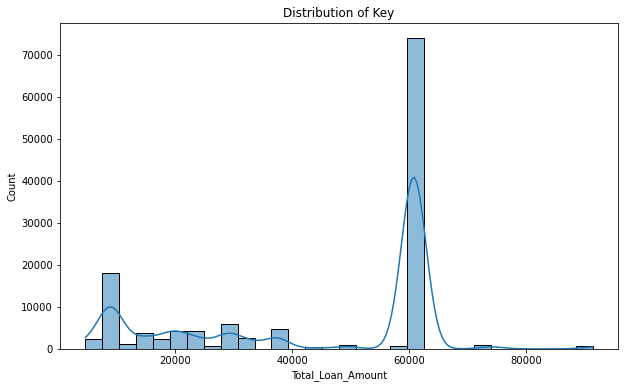

In [529]:
# Plot histolot to show data distribution
plt.figure(figsize=(10, 6))
sns.histplot(final_merged_df_100k[num_cols[1]], bins=30, kde=True)

# Add title 
plt.title("Distribution of " + num_cols[0])
plt.show()

Let's check for outliers

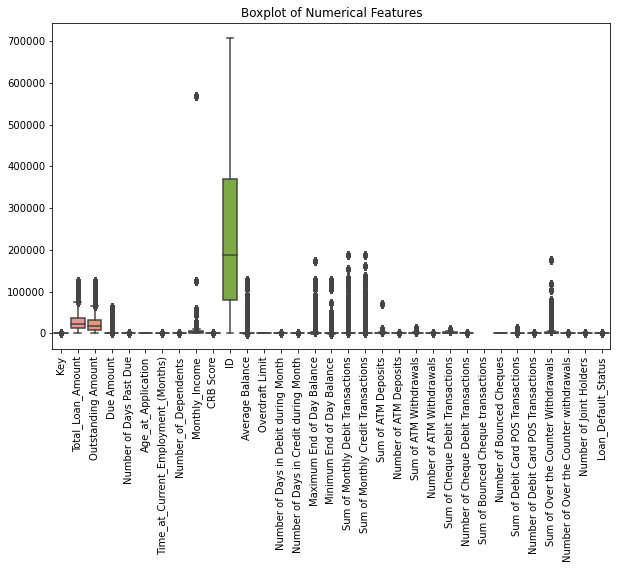

In [530]:
# Boxplots for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=final_merged_1m_df[num_cols])
plt.xticks(rotation=90)

# Add title
plt.title("Boxplot of Numerical Features")
plt.show()

*Observation*
* *Monthly_Income* has an outlier

### Categorical Columns Value counts

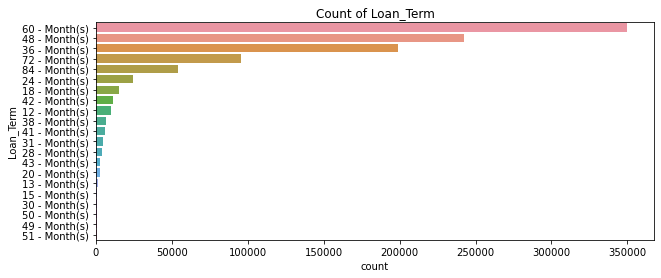

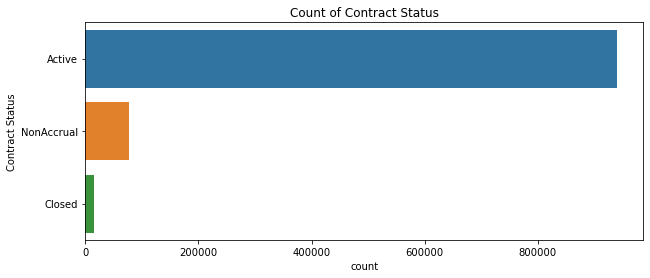

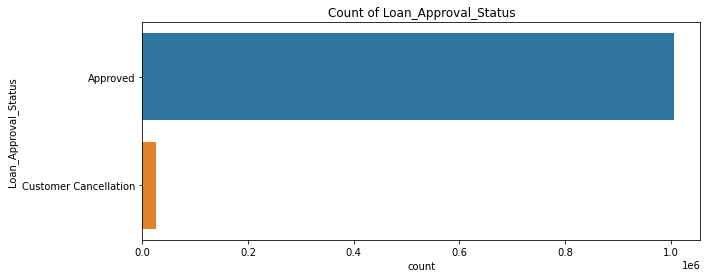

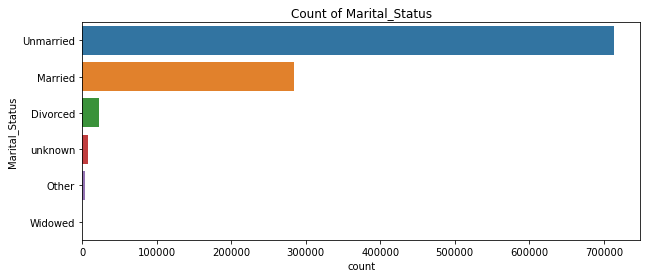

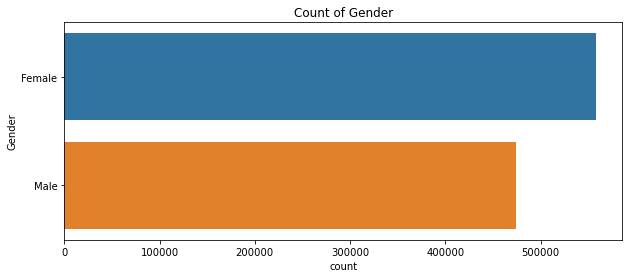

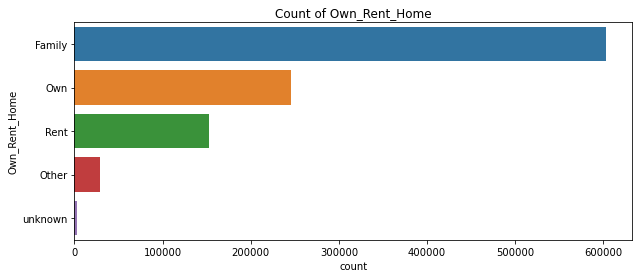

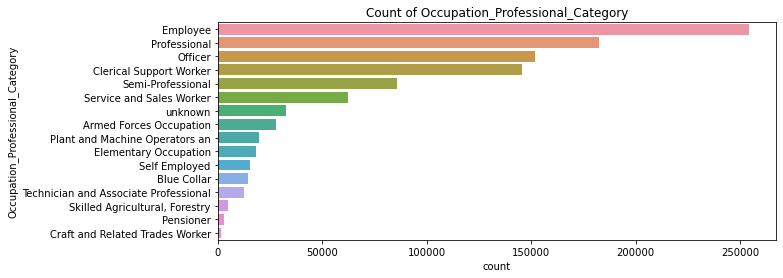

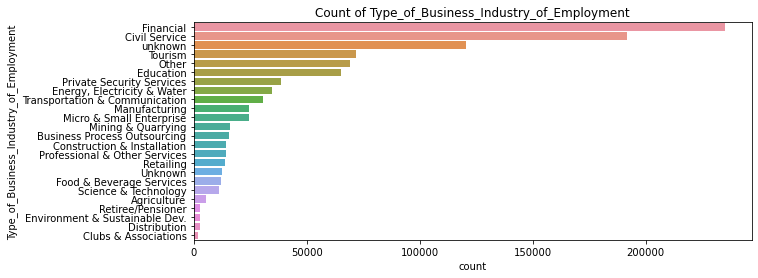

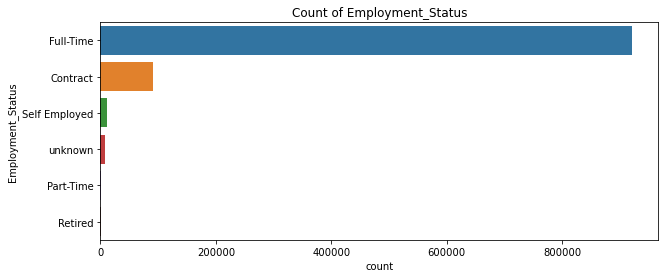

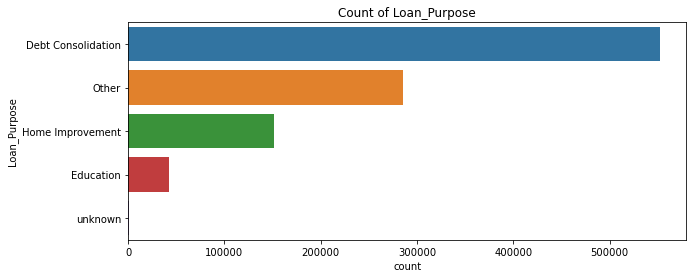

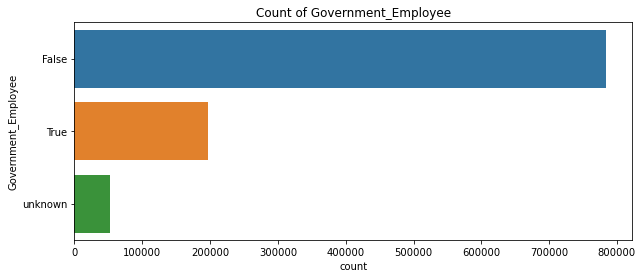

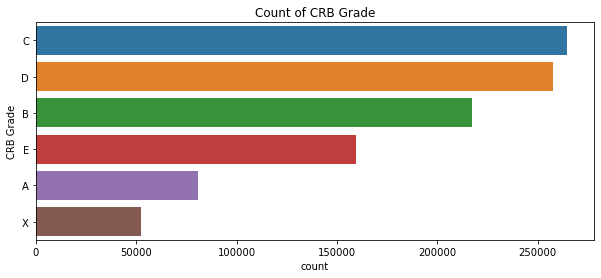

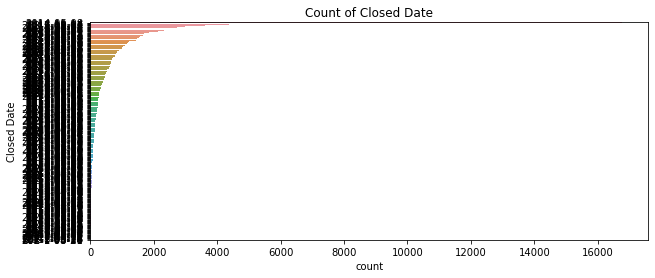

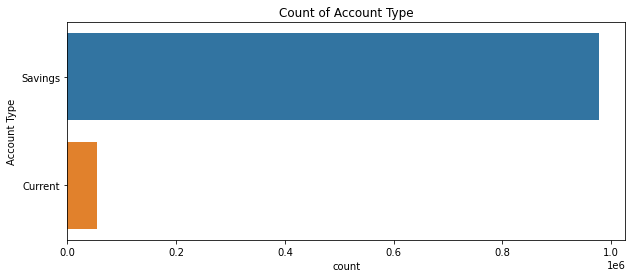

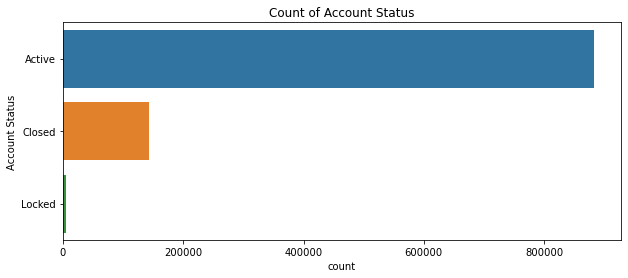

In [534]:
# Remove unnecessary columns
# cat_cols.remove("SpshotMonth")
# cat_cols.remove("Month (YYYY-MM)")
cat_cols.remove("Account_Number")
cat_cols.remove("Loan_Type")

# Categorical value counts
for col in cat_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=final_merged_1m_df[col], order=final_merged_1m_df[col].value_counts().index)
    
    # Add title 
    plt.title(f"Count of {col}")
    plt.show()

In [535]:
# Check unique value counts
final_merged_1m_df["Contract Status"].value_counts()

Active        939665
NonAccrual     76815
Closed         15718
Name: Contract Status, dtype: int64

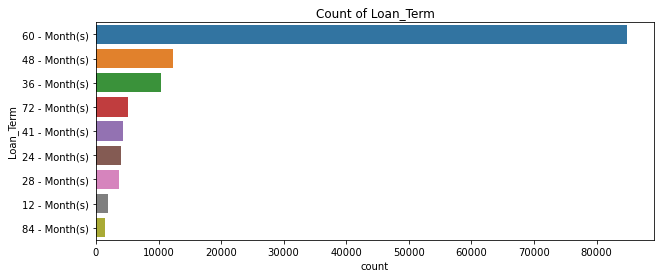

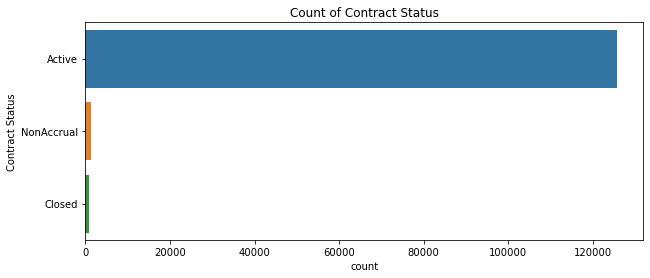

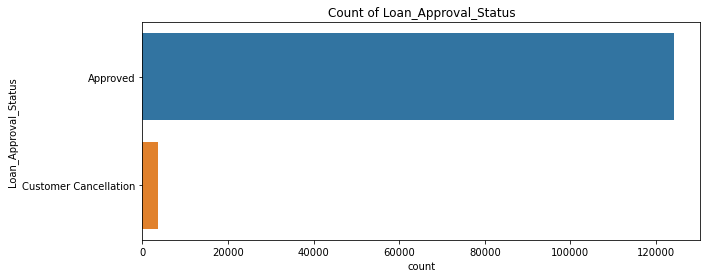

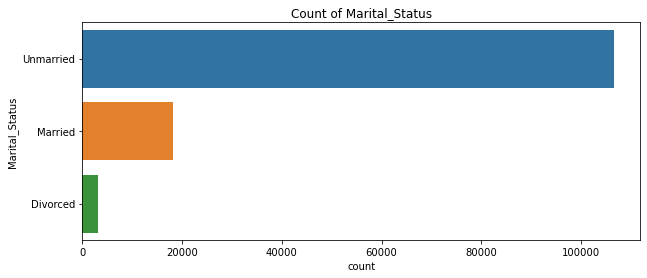

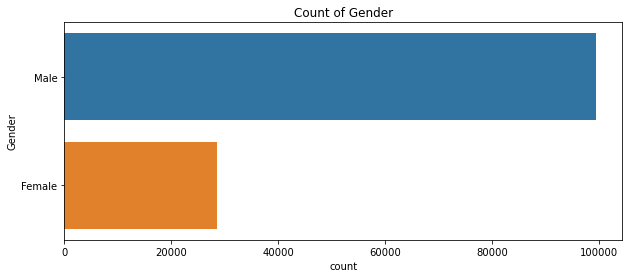

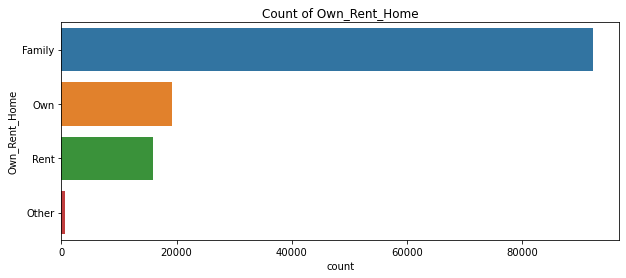

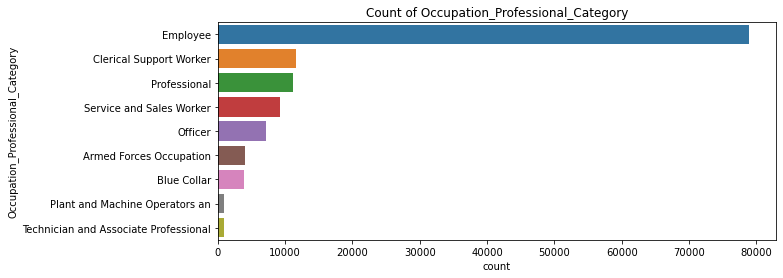

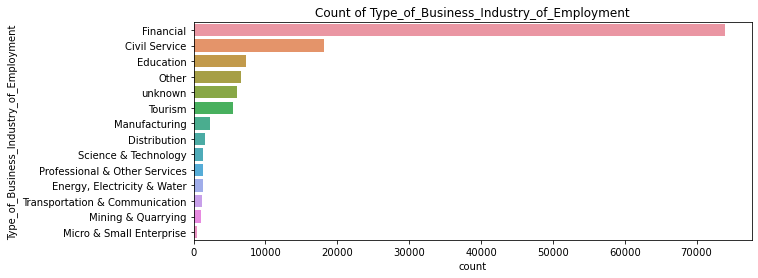

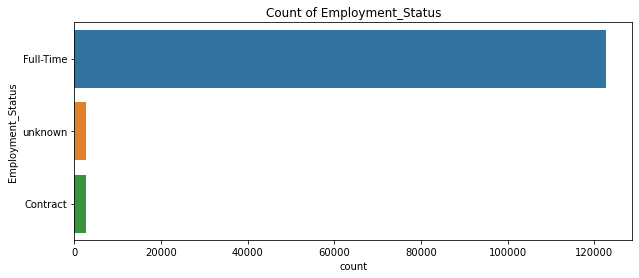

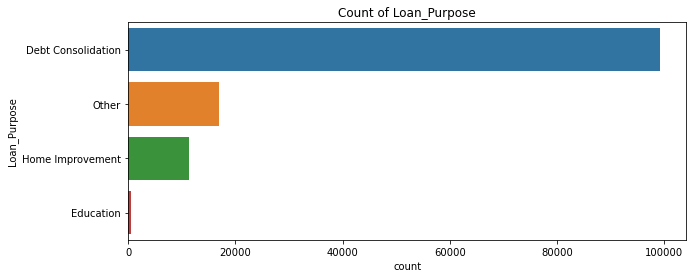

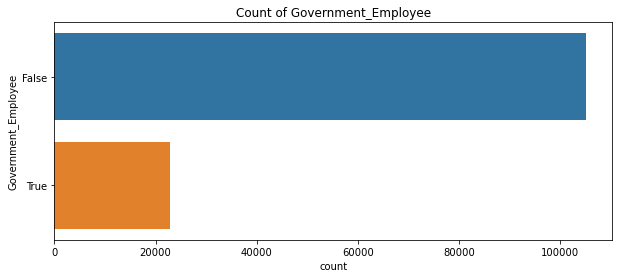

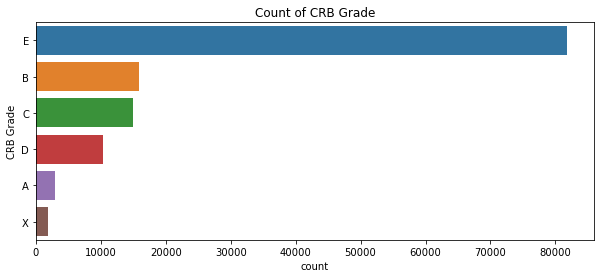

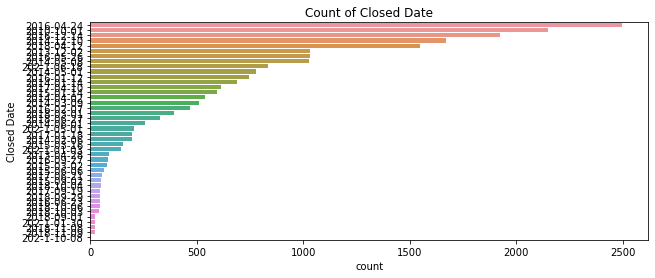

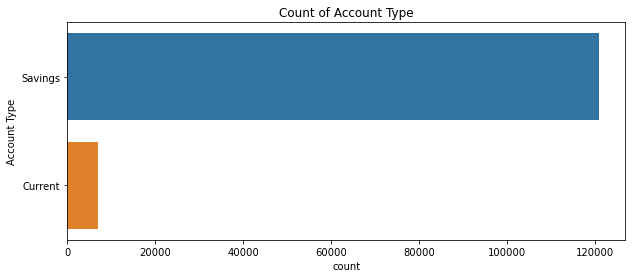

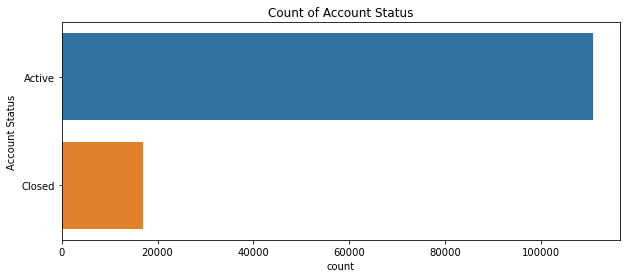

In [536]:
# Categorical value counts
for col in cat_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=final_merged_df_100k[col], order=final_merged_df_100k[col].value_counts().index)
    
    # Add title 
    plt.title(f"Count of {col}")
    plt.show()

## Bivariate EDA

### **Loan Default vs Borrower’s Financial Status**

* Loan_Default_Status vs Monthly_Income: Do low-income borrowers default more?

* Loan_Default_Status vs Average Balance: Do borrowers with lower account balances have higher default rates?

* Loan_Default_Status vs Overdraft Limit: Does access to overdraft impact loan default?

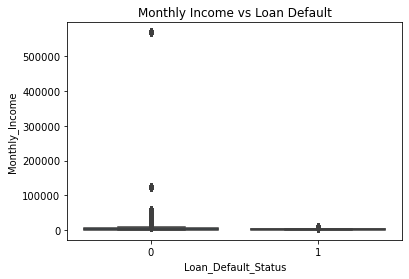

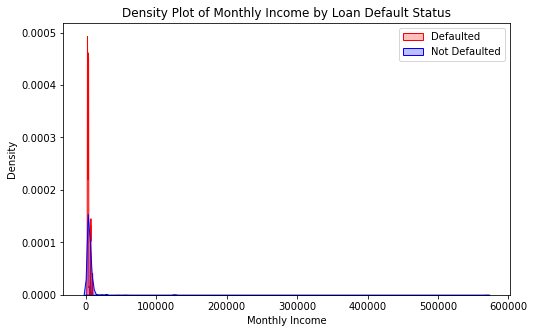

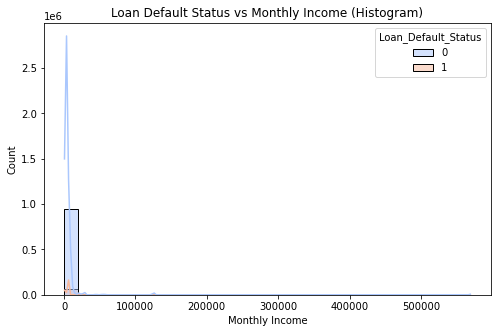

In [537]:
# Plot boxplot Loan_Default_Status vs Monthly_Income
sns.boxplot(x="Loan_Default_Status", y="Monthly_Income", data=final_merged_1m_df)

# Add title 
plt.title("Monthly Income vs Loan Default")

# Plot a kde plot Loan_Default_Status vs Monthly_Income
plt.figure(figsize=(8, 5))
sns.kdeplot(final_merged_1m_df[final_merged_1m_df["Loan_Default_Status"] == 1]["Monthly_Income"], 
            label="Defaulted", shade=True, color="red")
sns.kdeplot(final_merged_1m_df[final_merged_1m_df["Loan_Default_Status"] == 0]["Monthly_Income"], 
            label="Not Defaulted", shade=True, color="blue")

# Add title 
plt.title("Density Plot of Monthly Income by Loan Default Status")

# Add Lables
plt.xlabel("Monthly Income")
plt.ylabel("Density")
plt.legend()

plt.figure(figsize=(8, 5))
sns.histplot(final_merged_1m_df, x="Monthly_Income", hue="Loan_Default_Status", 
             bins=30, kde=True, palette="coolwarm")
plt.title("Loan Default Status vs Monthly Income (Histogram)")
plt.xlabel("Monthly Income")
plt.ylabel("Count")

plt.show()

### **Loan Default vs Loan Characteristics**

* Loan_Default_Status vs Loan_Type: Are certain loan types riskier?

* Loan_Default_Status vs Loan_Term: Do long-term loans default more?

* Loan_Default_Status vs Total_Loan_Amount: Do larger loans have higher default rates?

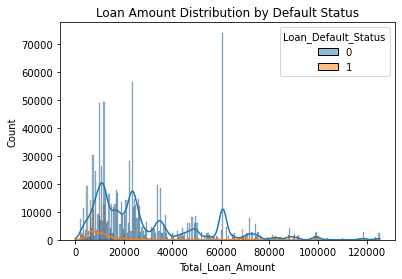

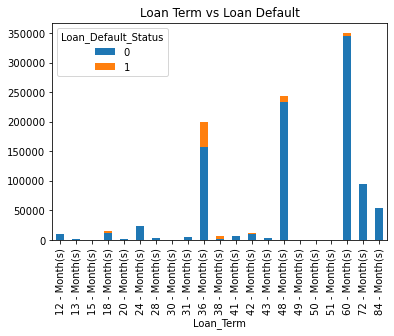

In [538]:
# Plot a hisplot Loan_Default_Status vs Total_Loan_Amount
sns.histplot(final_merged_1m_df, x="Total_Loan_Amount", hue="Loan_Default_Status", kde=True)
plt.title("Loan Amount Distribution by Default Status")

# Plot a crosstab bar plot Loan_Default_Status vs Loan_Term
pd.crosstab(final_merged_1m_df["Loan_Term"], 
            final_merged_1m_df["Loan_Default_Status"]).plot(kind="bar", stacked=True)
plt.title("Loan Term vs Loan Default")

plt.show()

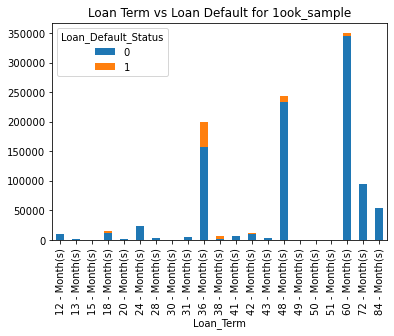

In [539]:
# Plot a crosstab bar plot Loan_Default_Status vs Loan_Term 100k dataset
pd.crosstab(final_merged_1m_df["Loan_Term"], 
            final_merged_1m_df["Loan_Default_Status"]).plot(kind="bar", stacked=True)
plt.title("Loan Term vs Loan Default for 1ook_sample")
plt.show()

### **Loan Default vs Borrower Demographics**

* Loan_Default_Status vs Government_Employee: Are government employees less likely to default?

* Loan_Default_Status vs Number_of_Dependents: Does having more dependents increase default risk?

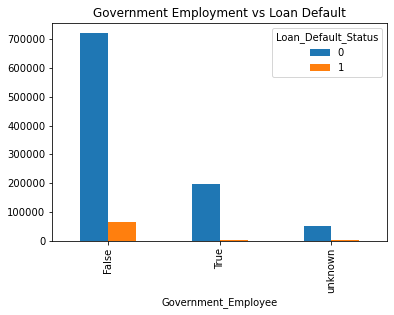

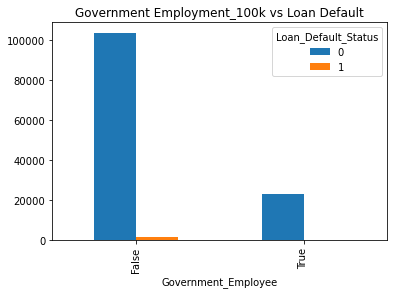

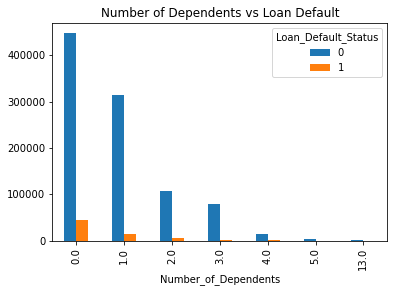

In [540]:
# Plot a crosstab bar plot Loan_Default_Status vs Government_Employee
pd.crosstab(final_merged_1m_df["Government_Employee"], 
            final_merged_1m_df["Loan_Default_Status"]).plot(kind="bar")
# Add title
plt.title("Government Employment vs Loan Default")

#2 To Check the difference
pd.crosstab(final_merged_df_100k["Government_Employee"], 
            final_merged_df_100k["Loan_Default_Status"]).plot(kind="bar")
# Add title
plt.title("Government Employment_100k vs Loan Default")

# Plot a crosstab bar plot Loan_Default_Status vs Number_of_Dependents
pd.crosstab(final_merged_1m_df["Number_of_Dependents"], 
            final_merged_1m_df["Loan_Default_Status"]).plot(kind="bar")
# Add title
plt.title("Number of Dependents vs Loan Default")

plt.show()

### **Loan Default vs Credit History**
* Loan_Default_Status vs CRB Score: Does a lower CRB score correlate with higher defaults?

* Loan_Default_Status vs CRB Grade: Are borrowers in lower CRB grades more likely to default?

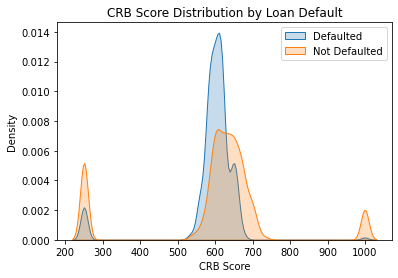

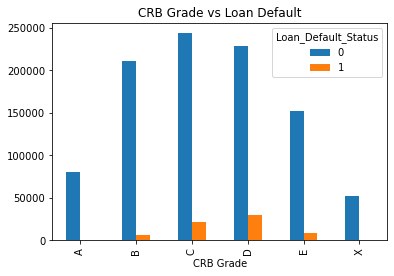

In [541]:
# Plot a kdeplot plot Loan_Default_Status vs CRB Score
sns.kdeplot(final_merged_1m_df[final_merged_1m_df["Loan_Default_Status"] == 1]["CRB Score"], 
            label="Defaulted", shade=True)
sns.kdeplot(final_merged_1m_df[final_merged_1m_df["Loan_Default_Status"] == 0]["CRB Score"], 
            label="Not Defaulted", shade=True)

# Add title
plt.title("CRB Score Distribution by Loan Default")

# Add a legend
plt.legend()

# Plot a crosstab bar plot Loan_Default_Status vs CRB Grade
pd.crosstab(final_merged_1m_df["CRB Grade"], 
            final_merged_1m_df["Loan_Default_Status"]).plot(kind="bar")
# Add title
plt.title("CRB Grade vs Loan Default")

plt.show()

### **Loan Default vs Account Behavior**
* Loan_Default_Status vs Sum of Monthly Credit Transaction: Do people with higher credit transactions default less?

* Loan_Default_Status vs Number of Days in Debit during Month: Does frequently being in debit predict default?

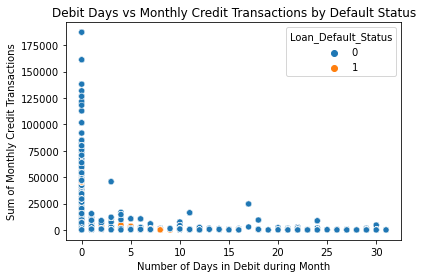

In [542]:
sns.scatterplot(x="Number of Days in Debit during Month", 
                y="Sum of Monthly Credit Transactions", 
                hue="Loan_Default_Status", data=final_merged_1m_df)
plt.title("Debit Days vs Monthly Credit Transactions by Default Status")
plt.show()

### Correlations

In [543]:
# numerical_cols_df = final_merged_df_100k[num_cols]
# plt.figure(figsize=(15,8))
# sns.heatmap(numerical_cols_df.corr(), annot=True, cmap="coolwarm", fmt='.2f')
# plt.title("Correlation Heatmap")
# plt.show()

In [544]:
# # Categorical Analysis: Chi-Square Test
# def chi_square_test(col1, col2):
#     contingency_table = pd.crosstab(final_merged_1m_df[col1], final_merged_1m_df[col2])
#     stat, p, dof, expected = chi2_contingency(contingency_table)
#     print(f"Chi-Square test between {col1} and {col2}: p-value = {p}")
#     return p

# # GMartal Status vs. Loan Type
# chi_square_test("Marital_Status", "Average Balance")

In [545]:
# # Create pairplot
# sns.pairplot(numerical_cols_df)
# plt.show()

In [546]:
# # Plot scatter plots for each pair of numerical columns
# plt.figure(figsize=(15, 10))

# for i, (col1, col2) in enumerate(itertools.combinations(num_cols, 2), start=1):
#     plt.subplot(5, 5, i)  # Adjust grid size based on number of plots
#     sns.scatterplot(data=final_merged_1m_df, x=col1, y=col2, alpha=0.5)
#     plt.xlabel(col1)
#     plt.ylabel(col2)
#     plt.title(f"{col1} vs {col2}")

# plt.tight_layout()
# plt.show()

# Feature Selection

## Finding key features that explain most variance

In [547]:
# final_merged_1m_df["Loan_Default_Status"] = final_merged_1m_df["Number of Days Past Due"].apply(lambda x: 1 if x >= 90 else 0)

# final_merged_df_100k["Loan_Default_Status"] = final_merged_df_100k["Number of Days Past Due"].apply(lambda x: 1 if x >= 90 else 0)

**Custom Mapping (Ordinal Encoding/Label Encoding)**

Use LE for ordinal (ordered) categorical variables:
* Occupation_Professional_Category (16 categories)
* Type_of_Business_Industry_of_Employment (24 categories)
* Contract Status (Active, NonAccrual, Closed)
* Loan_Purpose (Debt Consolidation, Other, Home Improvement, Education, unknown)
* Loan_Approval_Status (Approved, Customer Cancellation)
* Government_Employee (False, True, unknown)
* Account Type (Savings, Current)
* Account Status (Active, Closed, Locked)
* CRB Grade (A ,B, C, D, E, X)
* Gender (Female, Male)
* Marital_Status: (Unmarried < Married < Divorced < Widowed < Other < Unknown)
* Own_Rent_Home: (Family < Own < Rent < Other < Unknown)
* Employment_Status: (Retired < Part-Time < Self Employed < Contract < Full-Time < Unknown)

### Ordinal Encoding / Label Encoding

In [548]:
# dataset = pd.read_csv("C:/Users/amerc/Desktop/Project data/final_merged_1m_df.csv")
# dataset.head()

dataset = pd.read_csv("C:/Users/amerc/Desktop/Project data/final_merged_df_100k.csv")
dataset.head(2)

,Application_ID,Key,Loan_Type,Contract_Start_Date,Expected_Contract_End_Date,Actual_Contract_End_Date,Loan_Term,Total_Loan_Amount,Snapshot Date,Outstanding Amount,...,Number of ATM Deposits,Number of ATM Withdrawals,Number of Cheque Debit Transactions,Number of Bounced Cheques,Number of Debit Card POS Transactions,Number of Over the Counter withdrawals,Account Type,Account Status,Number of Joint Holders,SpshotMonth
0,C302106811,1,Unsecured Personal Loan,2021-02-28,2025-02-28,2007-11-30,72 - Month(s),43018.1,2021-02-28,43018.1,...,0.0,0.0,0.0,0.0,0.0,0.0,Current,Active,0.0,202-1-02-01
1,C302106811,1,Unsecured Personal Loan,2021-02-28,2025-02-28,2007-11-30,72 - Month(s),43018.1,2021-02-28,43018.1,...,0.0,0.0,0.0,0.0,0.0,0.0,Current,Active,0.0,202-1-02-01


Generate Loan_Default_Status

In [549]:
# Create a Loan_Default_Status feature
dataset["Loan_Default_Status"] = dataset["Number of Days Past Due"].apply(lambda x: 1 if x >= 90 else 0)

Change Government_Employee column to string dtype

In [550]:
dataset.columns[26]
# Convert Governement Emp. column to string
dataset["Government_Employee"] = dataset["Government_Employee"].astype(str)

#### Change loan term to int - by removing text
Make Loan_Term of int Dtype

In [551]:
# Function to extract numeric value
def extract_months(term):
    match = re.search(r'\d+', str(term))  # Find first number in string
    return int(match.group()) if match else None  # Convert to int

# Apply function to Loan_Term column
dataset['Loan_Term'] = dataset['Loan_Term'].apply(extract_months)

# Check result
print(dataset['Loan_Term'].head())

0    72
1    72
2    72
3    72
4    72
Name: Loan_Term, dtype: int64


In [552]:
# Encode the contract_status column
contract_status_mapping = {'Active': 0, 'NonAccrual': 1, 'Closed': 2}
dataset['Contract Status'] = dataset['Contract Status'].map(contract_status_mapping)


In [553]:
# Confirm if encoded/mapped
dataset['Contract Status'].value_counts()

0    125613
1      1371
2       924
Name: Contract Status, dtype: int64

Encode other columns

In [554]:
marital_status_mapping = {'unknown': 0, 'Other': 1, 'Unmarried': 2, 'Widowed': 3, 'Divorced': 4, 'Married': 5}
dataset['Marital_Status'] = dataset['Marital_Status'].map(marital_status_mapping)

own_rent_home_mapping = {'unknown': 0, 'Other': 1, 'Family': 2, 'Rent': 3, 'Own': 4}
dataset['Own_Rent_Home'] = dataset['Own_Rent_Home'].map(own_rent_home_mapping)

employment_status_mapping = {'unknown': 0, 'Retired': 1, 'Part-Time': 2, 'Contract': 3, 'Self Employed': 4, 'Full-Time': 5}
dataset['Employment_Status'] = dataset['Employment_Status'].map(employment_status_mapping)

loan_purpose_mapping = {'unknown': 0, 'Other': 1, 'Education': 2, 'Home Improvement': 3, 'Debt Consolidation': 4}
dataset['Loan_Purpose'] = dataset['Loan_Purpose'].map(loan_purpose_mapping)

loan_approval_status_mapping = {'Customer Cancellation': 0, 'Approved': 1}
dataset['Loan_Approval_Status'] = dataset['Loan_Approval_Status'].map(loan_approval_status_mapping)

account_type_mapping = {'Savings': 0, 'Current': 1}
dataset['Account Type'] = dataset['Account Type'].map(account_type_mapping)

government_employee_mapping = {'unknown': 0, 'False': 1, 'True': 2}
dataset['Government_Employee'] = dataset['Government_Employee'].map(government_employee_mapping)

# Define the mapping - Account Status
account_status_mapping = {'Locked': 0, 'Closed': 1, 'Active': 2}
# Apply the mapping
dataset['Account Status'] = dataset['Account Status'].map(account_status_mapping)

# Define the mapping- crb Grade
crb_grade_mapping = {'X': 0, 'E': 1, 'D': 2, 'C': 3, 'B': 4, 'A': 5}
# Apply the mapping
dataset['CRB Grade'] = dataset['CRB Grade'].map(crb_grade_mapping)



In [555]:
# Define the mapping
gender_mapping = {'Female': 0, 'Male': 1, 'Other': 2}

# Apply the mapping
dataset['Gender'] = dataset['Gender'].map(gender_mapping)


# dataset['Occupation_Professional_Category'] 
occupation_Prof_Cat_mapping = {'Employee': 0, 'Clerical Support Worker':1, 
              'Professional': 2, 'Service and Sales Worker':3, 'Officer': 4, 
              'Armed Forces Occupation': 5, 'Blue Collar': 6, 
              'Plant and Machine Operators an': 7, 
              'Technician and Associate Professional': 8}
dataset['Occupation_Professional_Category'] = dataset['Occupation_Professional_Category'].map(occupation_Prof_Cat_mapping)

type_of_Bus_Industry_of_Emp_mapping= {'unknown':0,'Financial':1, 
              'Civil Service':2, 'Education':3, 'Tourism':4, 'Manufacturing':4, 
              'Distribution':5, 'Science & Technology':6, 
              'Professional & Other Services':7, 'Energy, Electricity & Water':8, 
              'Transportation & Communication':9, 'Mining & Quarrying':10, 
              'Micro & Small Enterprise':11, 'Other':12}
dataset['Type_of_Business_Industry_of_Employment'] = dataset['Type_of_Business_Industry_of_Employment'].map(type_of_Bus_Industry_of_Emp_mapping)

In [556]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127908 entries, 0 to 127907
Data columns (total 54 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Application_ID                           127908 non-null  object 
 1   Key                                      127908 non-null  int64  
 2   Loan_Type                                127908 non-null  object 
 3   Contract_Start_Date                      127908 non-null  object 
 4   Expected_Contract_End_Date               127908 non-null  object 
 5   Actual_Contract_End_Date                 127908 non-null  object 
 6   Loan_Term                                127908 non-null  int64  
 7   Total_Loan_Amount                        127908 non-null  float64
 8   Snapshot Date                            127908 non-null  object 
 9   Outstanding Amount                       127908 non-null  float64
 10  Due Amount                      

In [557]:
dataset.isnull().sum()

Application_ID                             0
Key                                        0
Loan_Type                                  0
Contract_Start_Date                        0
Expected_Contract_End_Date                 0
Actual_Contract_End_Date                   0
Loan_Term                                  0
Total_Loan_Amount                          0
Snapshot Date                              0
Outstanding Amount                         0
Due Amount                                 0
Number of Days Past Due                    0
Contract Status                            0
Application_Date_x                         0
Loan_Approval_Status                       0
Age_at_Application                         0
Marital_Status                             0
Gender                                     0
Own_Rent_Home                              0
Occupation_Professional_Category           0
Type_of_Business_Industry_of_Employment    0
Employment_Status                          0
Time_at_Cu

In [558]:
dataset.duplicated().sum()

0

## Feature selection - (Correlation analysis & RFE)

### Using Correlation Analysis (Numerical features only)

In [559]:
# final_merged_1m_df.drop(columns="ID", inplace=True)
# dataset["Loan_Default_Status"] = dataset["Number of Days Past Due"].apply(lambda x: 1 if x >= 90 else 0)

In [560]:
# Compute correlation matrix
corr_matrix = dataset.corr()

# Sort correlation values with target variable
corr_target = corr_matrix["Loan_Default_Status"].abs().sort_values(ascending=False)
# print(corr_target)

# Select features with correlation >= 0.1
strong_features = corr_target[corr_target >= 0.1].index

# Drop weakly correlated features
df_selected = dataset[strong_features]

print("Selected Features:", [df_selected.columns])

# # Visualize top correlated features
# plt.figure(figsize=(10,6))
# sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
# plt.title("Correlation Heatmap")
# plt.show()

Selected Features: [Index(['Loan_Default_Status', 'Number of Days Past Due', 'Contract Status',
       'Due Amount', 'Loan_Approval_Status', 'Loan_Purpose', 'Gender',
       'Monthly_Income', 'Outstanding Amount',
       'Time_at_Current_Employment_(Months)', 'Total_Loan_Amount', 'Loan_Term',
       'Employment_Status', 'Occupation_Professional_Category'],
      dtype='object')]


### Chi Sqaure - Feature selection

In [561]:
# Identify date columns
date_cols = ['Contract_Start_Date', 'Expected_Contract_End_Date', 'Actual_Contract_End_Date', 
             'Snapshot Date', 'Month (YYYY-MM)', 'SpshotMonth', "Application_Date_x",
             "Application_Date_y", "Open Date","Last Transaction Date"]

# Drop date columns
dataset = dataset.drop(columns=date_cols, errors='ignore')

# Display remaining columns
print("Remaining columns after dropping date columns:")
print(dataset.columns)

Remaining columns after dropping date columns:
Index(['Application_ID', 'Key', 'Loan_Type', 'Loan_Term', 'Total_Loan_Amount',
       'Outstanding Amount', 'Due Amount', 'Number of Days Past Due',
       'Contract Status', 'Loan_Approval_Status', 'Age_at_Application',
       'Marital_Status', 'Gender', 'Own_Rent_Home',
       'Occupation_Professional_Category',
       'Type_of_Business_Industry_of_Employment', 'Employment_Status',
       'Time_at_Current_Employment_(Months)', 'Number_of_Dependents',
       'Loan_Purpose', 'Monthly_Income', 'Government_Employee', 'CRB Score',
       'CRB Grade', 'ID', 'Account_Number', 'Average Balance',
       'Overdraft Limit', 'Number of Days in Debit during Month',
       'Number of Days in Credit during Month', 'Maximum End of Day Balance',
       'Minimum End of Day Balance', 'Sum of Monthly Debit Transactions',
       'Sum of Monthly Credit Transactions', 'Number of ATM Deposits',
       'Number of ATM Withdrawals', 'Number of Cheque Debit Transac

In [562]:
dataset.drop(columns=["Application_ID", "ID", "Loan_Type", 
                      "Account_Number"], inplace=True) #"PCA1", "PCA2",

In [563]:
# Confirm
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127908 entries, 0 to 127907
Data columns (total 40 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Key                                      127908 non-null  int64  
 1   Loan_Term                                127908 non-null  int64  
 2   Total_Loan_Amount                        127908 non-null  float64
 3   Outstanding Amount                       127908 non-null  float64
 4   Due Amount                               127908 non-null  float64
 5   Number of Days Past Due                  127908 non-null  float64
 6   Contract Status                          127908 non-null  int64  
 7   Loan_Approval_Status                     127908 non-null  int64  
 8   Age_at_Application                       127908 non-null  float64
 9   Marital_Status                           127908 non-null  int64  
 10  Gender                          

In [586]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import MinMaxScaler

# Define features (X) and target (y)
X = dataset[['Contract Status', 'Loan_Approval_Status', 'Marital_Status', 'Gender', 
             'Own_Rent_Home', 'Occupation_Professional_Category', 
             'Type_of_Business_Industry_of_Employment', 'Employment_Status', 
             'Loan_Purpose', 'Government_Employee', 'CRB Grade', 'Account Type', 
             'Account Status']]

y = dataset['Loan_Default_Status']

# Apply Chi-Square test
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X, y)

# Get p-values
p_values = pd.Series(chi2_selector.pvalues_, index=X.columns)
p_values.sort_values(ascending=True, inplace=True)

# Display p-values
print(p_values)

p_values.index[:10]

Contract Status                             0.000000e+00
Occupation_Professional_Category            0.000000e+00
Loan_Purpose                                0.000000e+00
Gender                                     4.001378e-196
Type_of_Business_Industry_of_Employment    1.082205e-105
Marital_Status                              2.629247e-90
Loan_Approval_Status                        8.023672e-46
Employment_Status                           2.094108e-41
Own_Rent_Home                               1.955122e-17
Government_Employee                         2.743325e-05
Account Type                                1.290602e-04
CRB Grade                                   6.314731e-03
Account Status                              9.126585e-03
dtype: float64


Index(['Contract Status', 'Occupation_Professional_Category', 'Loan_Purpose',
       'Gender', 'Type_of_Business_Industry_of_Employment', 'Marital_Status',
       'Loan_Approval_Status', 'Employment_Status', 'Own_Rent_Home',
       'Government_Employee'],
      dtype='object')

### Using Mutual Information (Categorical & Numerical)

In [573]:
from sklearn.feature_selection import mutual_info_classif

X = dataset.drop("Loan_Default_Status", axis=1)
# X = new_df.drop("Application_ID", axis=1)
y = dataset["Loan_Default_Status"]

# Compute Mutual Information scores
mi_scores = mutual_info_classif(X, y, discrete_features="auto")

# Create a DataFrame of feature importance
mi_scores_df = pd.DataFrame({"Feature": X.columns, "MI Score": mi_scores})
mi_scores_df = mi_scores_df.sort_values(by="MI Score", ascending=False)

print(mi_scores_df.head(10))  # Show top 10 important features

#  Error: MemoryError: Unable to allocate 7.98 GiB for an array with shape (1038, 1032198) and data type object

                                Feature  MI Score
5               Number of Days Past Due  0.055837
4                            Due Amount  0.055782
6                       Contract Status  0.052948
3                    Outstanding Amount  0.050413
18                       Monthly_Income  0.046134
14                    Employment_Status  0.044352
15  Time_at_Current_Employment_(Months)  0.040370
2                     Total_Loan_Amount  0.040167
17                         Loan_Purpose  0.037746
7                  Loan_Approval_Status  0.036937


In [580]:
mi_scores_df['Feature'][:10].values

array(['Number of Days Past Due', 'Due Amount', 'Contract Status',
       'Outstanding Amount', 'Monthly_Income', 'Employment_Status',
       'Time_at_Current_Employment_(Months)', 'Total_Loan_Amount',
       'Loan_Purpose', 'Loan_Approval_Status'], dtype=object)

#### Using RFE (Recursive Feature Elimination)

In [566]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Define target variable
X = dataset.drop("Loan_Default_Status", axis=1)  # Features
y = dataset["Loan_Default_Status"]  # Target

# Initialize model (Random Forest as an example)
model = RandomForestClassifier()

rfe = RFE(model, n_features_to_select=10)  # Select top 10 features
X_selected = rfe.fit_transform(X, y)

# Show selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['Total_Loan_Amount', 'Outstanding Amount', 'Due Amount',
       'Number of Days Past Due', 'Contract Status', 'Loan_Approval_Status',
       'Age_at_Application', 'Occupation_Professional_Category',
       'Monthly_Income', 'CRB Score'],
      dtype='object')


#### Using PCA

In [567]:
# # Standardize data
# scaler = StandardScaler()
# scaled_final_merged_1m_df = scaler.fit_transform(numerical_cols_df)

# # Apply PCA
# pca = PCA(n_components=2)
# pca_result = pca.fit_transform(scaled_final_merged_1m_df)

# # Convert to DataFrame
# final_merged_1m_df['PCA1'] = pca_result[:, 0]
# final_merged_1m_df['PCA2'] = pca_result[:, 1]

# # Scatter plot
# sns.scatterplot(data=final_merged_1m_df, x="PCA1", y="PCA2", hue="Loan_Default_Status", alpha=0.6) 
# plt.title("PCA Visualization")
# plt.show()

Columns seected by different methods:

In [ ]:
cols_by_corr_analysis =['Loan_Default_Status', 'Number of Days Past Due', 
       'Contract Status', 'Due Amount', 'Loan_Approval_Status', 'Loan_Purpose', 
       'Gender', 'Monthly_Income', 'Outstanding Amount',
       'Time_at_Current_Employment_(Months)', 'Total_Loan_Amount', 'Loan_Term',
       'Employment_Status', 'Occupation_Professional_Category']

chi2_selected_feat = ['Contract Status', 'Occupation_Professional_Category', 
       'Loan_Purpose', 'Gender', 'Type_of_Business_Industry_of_Employment', 
       'Marital_Status', 'Loan_Approval_Status', 'Employment_Status', 'Own_Rent_Home',
       'Government_Employee']

mutual_info_select_feat = ['Number of Days Past Due', 'Due Amount', 'Contract Status',
       'Outstanding Amount', 'Monthly_Income', 'Employment_Status',
       'Time_at_Current_Employment_(Months)', 'Total_Loan_Amount',
       'Loan_Purpose', 'Loan_Approval_Status']

rfe_top10_cols = ['Total_Loan_Amount', 'Outstanding Amount', 'Due Amount',
       'Number of Days Past Due', 'Contract Status', 'Age_at_Application',
       'Occupation_Professional_Category',
       'Time_at_Current_Employment_(Months)', 'Monthly_Income', 'CRB Score']

# Modeling

Base model - Logistic Regression

In [592]:
from sklearn.metrics import classification_report, roc_auc_score

# Get target variable
X = dataset.drop('Loan_Default_Status', axis=1)
y = dataset['Loan_Default_Status']

# Scale
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initializing and training the model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Making predictions
y_pred = lr_model.predict(X_test)
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]

# Evaluating the model
print(classification_report(y_test, y_pred))
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.2f}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25314
           1       1.00      1.00      1.00       268

    accuracy                           1.00     25582
   macro avg       1.00      1.00      1.00     25582
weighted avg       1.00      1.00      1.00     25582

AUC-ROC: 1.00


Random Forest modeling

In [594]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# # Get target variable
# X = dataset.drop('Loan_Default_Status', axis=1)
# y = dataset['Loan_Default_Status']

# # Scale
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

# # Split to train  and test data
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     37969
           1       1.00      1.00      1.00       404

    accuracy                           1.00     38373
   macro avg       1.00      1.00      1.00     38373
weighted avg       1.00      1.00      1.00     38373



In [589]:
dataset["Loan_Default_Status"].value_counts()

0    126636
1      1272
Name: Loan_Default_Status, dtype: int64

LightGBM

In [596]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
lgb_model = lgb.LGBMClassifier(random_state=42)

# Train the model
lgb_model.fit(X_train, y_train)

# Predict
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate model
print("LightGBM Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lgb):.2f}")
print(classification_report(y_test, y_pred_lgb))

ModuleNotFoundError: No module named 'lightgbm'

XGBOOST

conda install -c anaconda py-xgboost

In [595]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("XGBoost Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.2f}")
print(classification_report(y_test, y_pred_xgb))

ModuleNotFoundError: No module named 'xgboost'